In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Load Application data

In [3]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
#count the missing values in the dataframe
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Treating columns

In [7]:
# storing the columns with missing values more than or equal to 30% in the list
app_data_missing=(app_data.columns[(round(100*(app_data.isnull().sum()/len(app_data)),2))>=30]).tolist()
app_data_missing

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [8]:
# dropping the columns with missing vlaues more that or eqaul to 30%
app_data=app_data.drop(app_data_missing,axis=1)

In [9]:
len(app_data.columns)

72

Dropping unwanted columns

In [10]:
# list of unwanted columns
unwanted_cols = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE','FLAG_OWN_CAR','FLAG_OWN_REALTY','ORGANIZATION_TYPE']
len(unwanted_cols)

22

In [11]:
# droping these unwanted columns
app_data=app_data.drop(unwanted_cols,axis=1)

In [12]:
app_data.shape

(307511, 50)

In [13]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOU

Treating rows

In [14]:
# As there are none of the rows, so we are not deleting rows on basis of this
len(app_data[app_data.isnull().sum(axis=1) > (len(app_data.columns)//2)].index)

0

In [15]:
# checking percent of missing values in columns
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
F

Since there are only 0.09 percentage of data so we remove them

In [16]:
# Treating missing values in AMT_GOODS_PRICE
app_data=app_data[~np.isnan(app_data['AMT_GOODS_PRICE'])]
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.82
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
F

In [17]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(app_data[np.isnan(app_data['EXT_SOURCE_2']) & np.isnan(app_data['EXT_SOURCE_3'])])

229

In [18]:
# As there are only 229 such records we can delete those.
# Note:- As we have total 307511 records deleting only 229 records will not affect our further analysis
# app_data=app_data[(~app_data['EXT_SOURCE_2'].isnull()) & (app_data['EXT_SOURCE_3'].isnull()))]
app_data=app_data[(~(np.isnan(app_data['EXT_SOURCE_2']) & np.isnan(app_data['EXT_SOURCE_3'])))]

In [19]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(app_data.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

EXT_SOURCE_2  EXT_SOURCE_3
count    306574.000    246336.000
mean          0.514         0.511
std           0.191         0.195
min           0.000         0.001
25%           0.392         0.371
50%           0.566         0.535
75%           0.664         0.669
max           0.855         0.896

###
There is very slight difference between mean and median so impute the values with the mean of EXT_SOURCE_2 and EXT_SOURCE_3

In [20]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
app_data.loc[np.isnan(app_data['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = app_data['EXT_SOURCE_2'].mean()
app_data.loc[np.isnan(app_data['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = app_data['EXT_SOURCE_3'].mean()
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
F

For the simplification of analysis of Normalized score from external data source, 
1. we are taking average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called EXT_SOURCE_SCORE
2. Dropping EXT_SOURCE_2 and EXT_SOURCE_3

In [21]:
app_data['EXT_SOURCE_SCORE'] = round(((app_data['EXT_SOURCE_2'] + app_data['EXT_SOURCE_3'])/2),2)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120              1.0                     2   
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0                           0      0.262949      0.139376                0   
1                           0      0.622246      0.510881                0   
2                           0      0.555912      0.729567                0   
3                           0      0.650442      0.510881                0   
4                           0      0.322738      0.510881                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 

<Axes: >

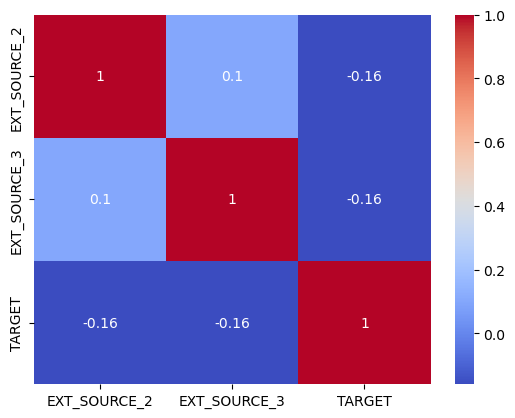

In [22]:
sns.heatmap(round(app_data[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',annot=True)

In [23]:
# dropping EXT_SOURCE_2 and EXT_SOURCE_3 as no such correlation exist with TARGET
app_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120              1.0                     2   
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                           0                0                1   
1                           0                0                1   
2                           0                0                0   
3                           0                0                1   
4                           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2

There are five columns left with the missing values. It is clear that there make no sense for counting the number of very short period of time or very long period of time like hour, day, week or month nor year.
So we will go with the count of quartly(nor too short nor too long)
1. Deleting the column for hours,day,week,month and year
2. Working with the column AMT_REQ_CREDIT_BUREAU_QRT


In [24]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
app_data = app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [25]:
(round(100*(app_data.isnull().sum()/len(app_data.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
F

In [26]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

We have the NaNs in this column but  since it is numerical variable so we cannot impute these NaNs with mean or median.

In [27]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT']

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307004, dtype: float64

We have to replace it with mode value.

So for this we have to convert this column from numerical variable to categorical variable

In [28]:
# converting to type category
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

It is clear from above observation that most common value in the AMT_REQ_CREDIT_BUREAU_QRT column is 0, 
so impute all NaNs with 0

In [29]:
# Here we used pd.isna since we have categorical variable and for numerical variable we will use np.isnan
app_data.loc[pd.isna(app_data['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0
(round(100*(app_data.isnull().sum()/len(app_data.index))),2)

(SK_ID_CURR                     0.0
 TARGET                         0.0
 NAME_CONTRACT_TYPE             0.0
 CODE_GENDER                    0.0
 CNT_CHILDREN                   0.0
 AMT_INCOME_TOTAL               0.0
 AMT_CREDIT                     0.0
 AMT_ANNUITY                    0.0
 AMT_GOODS_PRICE                0.0
 NAME_INCOME_TYPE               0.0
 NAME_EDUCATION_TYPE            0.0
 NAME_FAMILY_STATUS             0.0
 NAME_HOUSING_TYPE              0.0
 REGION_POPULATION_RELATIVE     0.0
 DAYS_BIRTH                     0.0
 DAYS_EMPLOYED                  0.0
 DAYS_ID_PUBLISH                0.0
 CNT_FAM_MEMBERS                0.0
 REGION_RATING_CLIENT           0.0
 REGION_RATING_CLIENT_W_CITY    0.0
 REG_REGION_NOT_LIVE_REGION     0.0
 REG_REGION_NOT_WORK_REGION     0.0
 FLAG_DOCUMENT_2                0.0
 FLAG_DOCUMENT_3                0.0
 FLAG_DOCUMENT_4                0.0
 FLAG_DOCUMENT_5                0.0
 FLAG_DOCUMENT_6                0.0
 FLAG_DOCUMENT_7            

In [30]:
app_data.shape

(307004, 44)

In [31]:
app_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'EXT_SOURCE_SCORE']

### Converting DAYS_BIRTH column into AGE column and then dividing them into groups of Young, Adult and Senior citizen

In [32]:
app_data['AGE'] = abs(app_data['DAYS_BIRTH']//365)
# droping DAYS_BIRTH and DAYS_EMPLOYED
app_data=app_data.drop(['DAYS_BIRTH'],axis=True)
app_data=app_data.drop(['DAYS_EMPLOYED'],axis=1)

In [33]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_2  \
0                           0                           0                0   
1                           0                           0                0   
2                           0                           0                0   
3                           0                           0                0   
4                           0                           0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT

#### Binning AGE_GROUP

In [34]:
#Group age groups, with Young<40, Adult<60 and Senior citizen with positive infinite greater than 60
bins = [0, 40, 60, 100]
labels = ['Young', 'Adult', 'Senior citizen']

# Create a new column 'AGE_GROUP' based on the 'AGE' column
app_data['AGE_GROUP'] = pd.cut(app_data['AGE'], bins=bins, labels=labels, right=False)


In [35]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_2  \
0                           0                           0                0   
1                           0                           0                0   
2                           0                           0                0   
3                           0                           0                0   
4                           0                           0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT

In [36]:
# numerical_columns = app_data.select_dtypes(include=['number'])
# numerical_columns

In [37]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.070040e+05
mean     1.688490e+05
std      2.372935e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Lets observe columns starting with name FLAG_

In [38]:
# flag_cols=[]

# for col in app_data.columns:
#     if col.startswith('FLAG'):
#         flag_cols.append(col)
# flag_cols
flag_cols = [col for col in app_data.columns if col.startswith('FLAG')]
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [39]:
app_data[flag_cols].head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                1                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0                 0  
1                 0                 0                 0                 0  
2                 0                 0                 0                 0  
3                 0                 0                 0                 0  
4                 0                 0                 0                 0

In [40]:
# adding Target col in the table and comparing Flag columns with target column
app_data[flag_cols+['TARGET']]

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                0                0                0   
3                     0                1                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
307506                0                0                0                0   
307507                0                1                0                0   
307508                0                1                0                0   
307509                0                1                0                0   
307510                0                1                0                0   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                1                0   
...                 ...              ...              ...              ...   
307506                0                0                1                0   
307507                0                0                0                0   
307508                0                0                0                0   
307509                0                0                0                0   
307510                0                0                0                0   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508              

### Ploting in context with TARGET for analysis

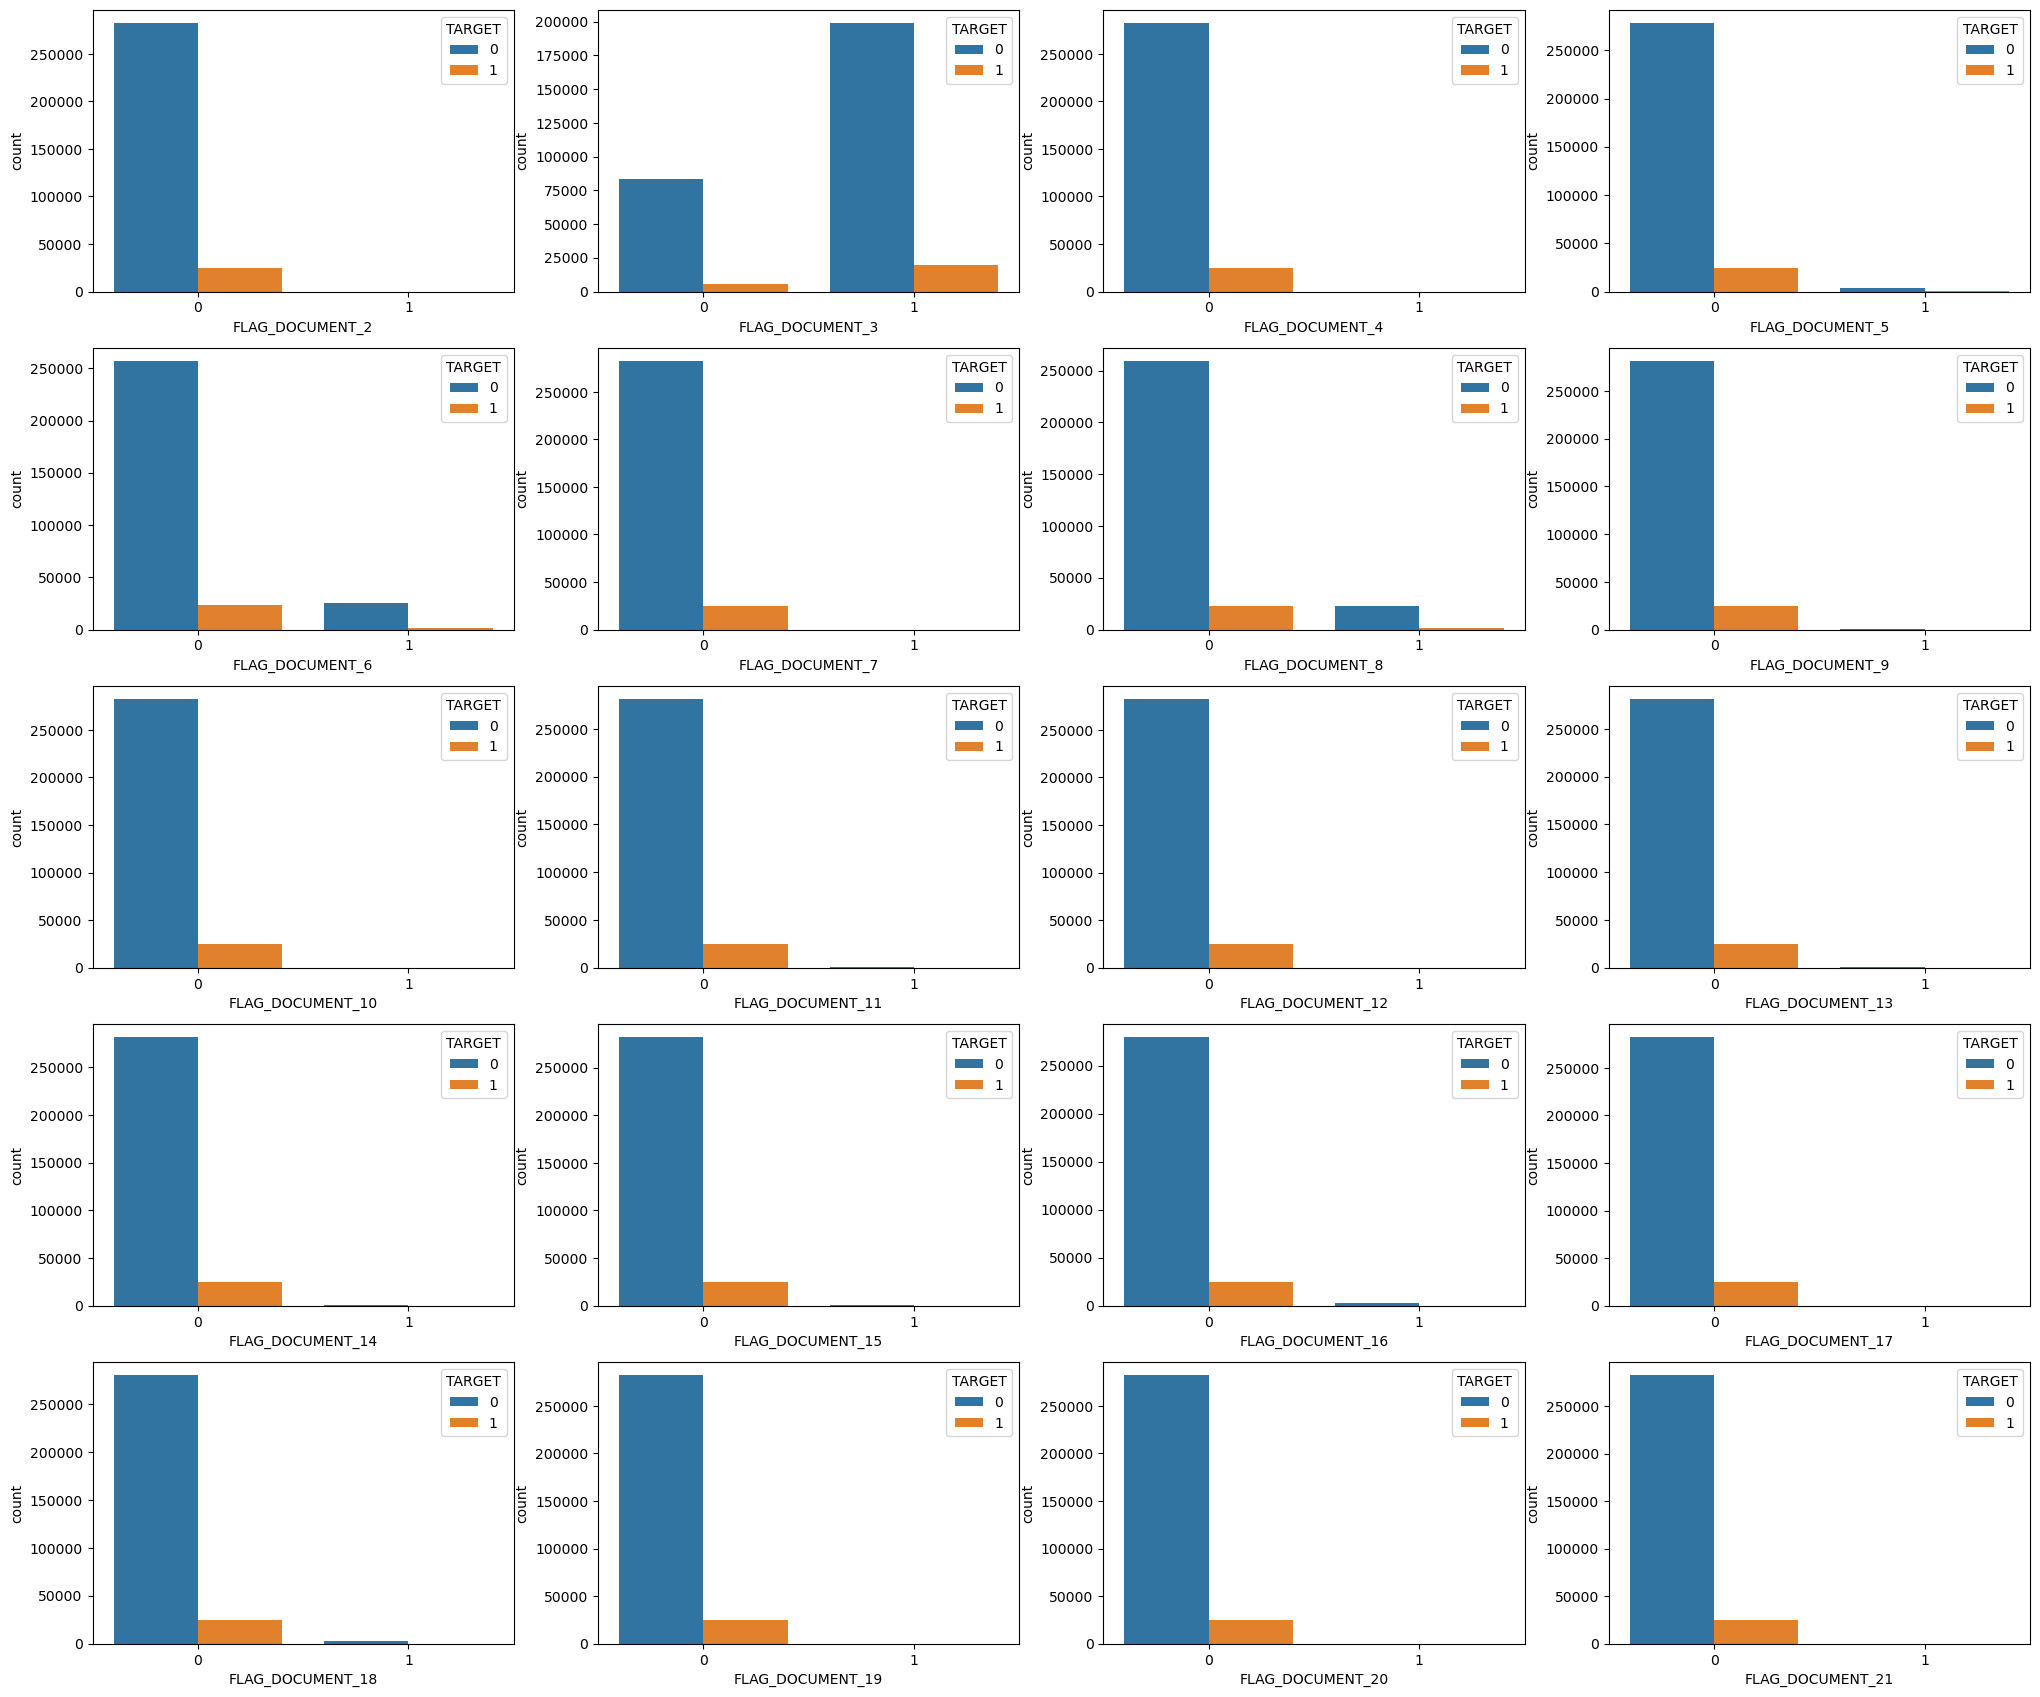

In [41]:
plt.figure(figsize=(25,30))

for i, col in enumerate(flag_cols):
    plt.subplot(7,4,i+1)
    sns.countplot(data=app_data[flag_cols+['TARGET']],x=col,hue='TARGET')

In [42]:
app_data=app_data.drop(labels=flag_cols,axis=1)
app_data.shape

(307004, 24)

In [43]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

  AMT_REQ_CREDIT_BUREAU_QRT  EXT_SOURCE_SCORE  AGE AGE_GROUP  
0                       0.0              0.20   26     Young  
1                       0.0              0.57   46     Adult  
2                       0.0              0.64   53     Adult  
3                       0.0              0.58   53     Adult  
4                       0.0              0.42   55     Adult

In [44]:
# Filling null with mode
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].fillna((app_data['CNT_FAM_MEMBERS'].mode()[0]))
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [45]:
app_data["AMT_INCOME_TOTAL"].describe()

count    3.070040e+05
mean     1.688490e+05
std      2.372935e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Data Imbalance

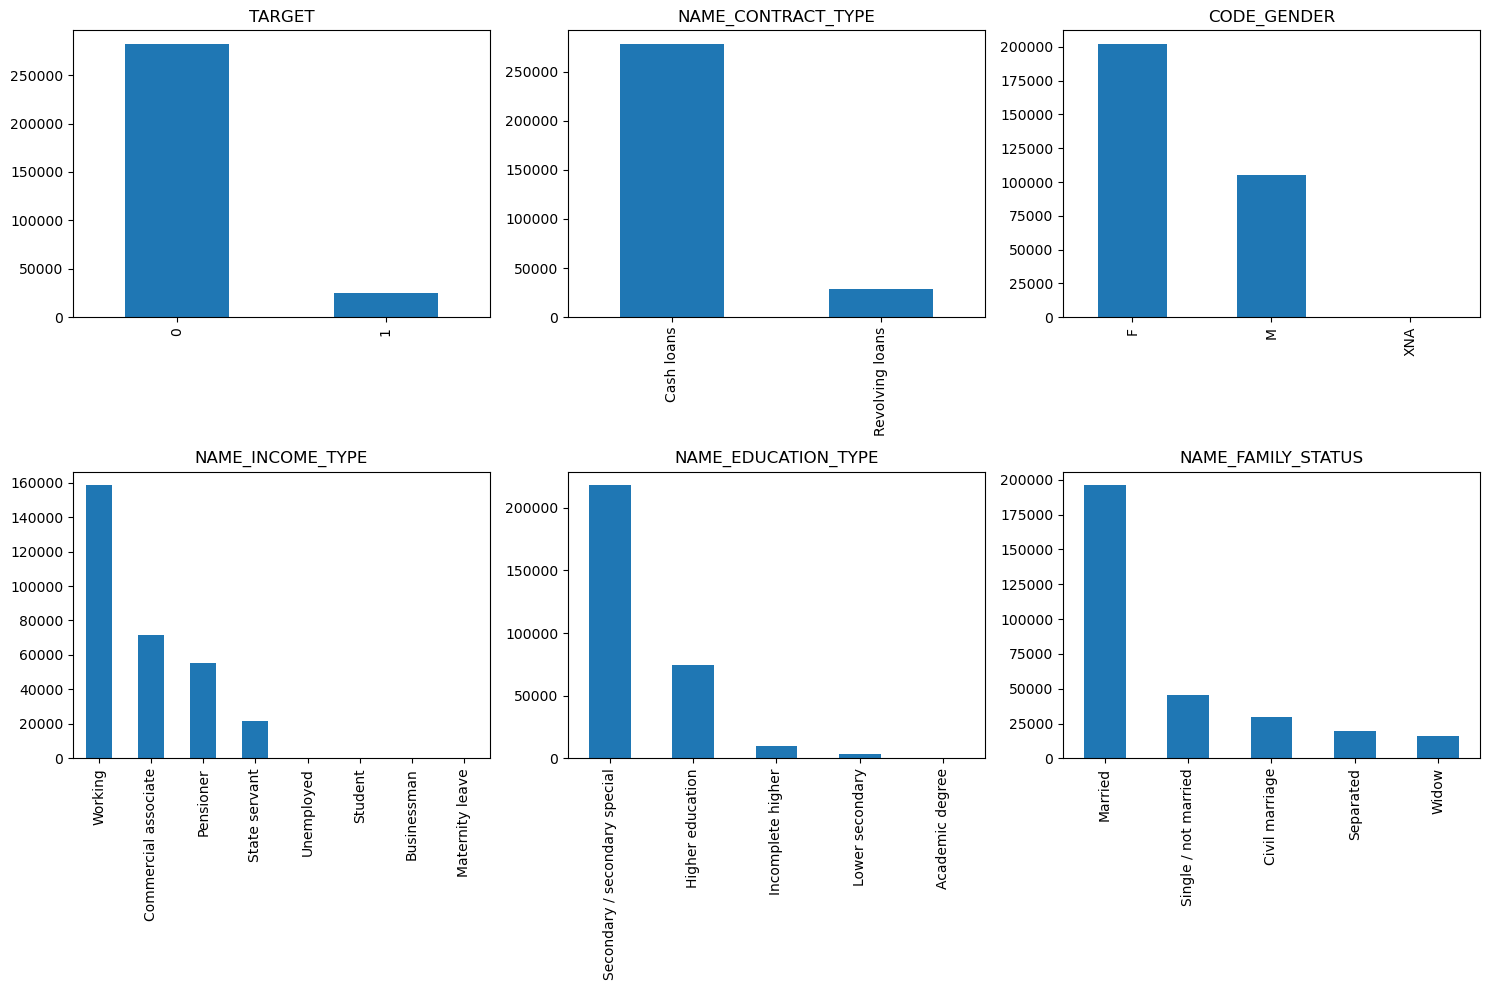

In [46]:
# List of columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

# Set figure size and create subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plotting each column
for i, col in enumerate(col_list):
    app_data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots and adjust layout
for i in range(len(col_list), len(axes)):
    fig.delaxes(axes[i])

# Display the plots
plt.tight_layout()
plt.show()


### Conclusion:
- TARGET - The number of defaulters (1) is significantly lower than the number of non-defaulters (0).
- NAME_CONTRACT_TYPE - There are notably fewer Revolving loans compared to Cash loans.
- NAME_EDUCATION_TYPE - The majority of loan applications are from individuals with Secondary/Secondary special education.
- NAME_FAMILY_STATUS - A significant portion of loan applicants are married individuals.
- NAME_HOUSING_TYPE - The majority of applications come from individuals who own homes or apartments.

## Binning
### Grouping AMT_INCOME_TOTAL column into High, Medium and Low

In [47]:
app_data['INCOME_GROUP'] = app_data['AMT_INCOME_TOTAL'].apply(lambda x: 'Low' if x < 100000 else ('Medium' if x < 150000 else 'High'))

In [48]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

  AMT_REQ_CREDIT_BUREAU_QRT  EXT_SOURCE_SCORE  AGE AGE_GROUP INCOME_GROUP  
0                       0.0              0.20   26     Young         High  
1                       0.0              0.57   46     Adult         High  
2                       0.0              0.64   53     Adult          Low  
3                       0.0              0.58   53     Adult       Medium  
4                       0.0              0.42   55     Adult       Medium

### Creating three credit amount groups - High, medium and low



In [49]:
round(app_data['AMT_CREDIT'].describe(),2)

count     307004.00
mean      599407.24
std       402558.12
min        45000.00
25%       270000.00
50%       514777.50
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [50]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [51]:
#Creating new column AGE_GROUP
app_data['CREDIT_GROUP'] = app_data['AMT_CREDIT'].apply(credit_group)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

  AMT_REQ_CREDIT_BUREAU_QRT  EXT_SOURCE_SCORE  AGE AGE_GROUP INCOME_GROUP  \
0                       0.0              0.20   26     Young         High   
1                       0.0              0.57   46     Adult         High   
2                       0.0              0.64   53     Adult          Low   
3                       0.0              0.58   53     Adult       Medium   
4                       0.0              0.42   55     Adult       Medium   

  CREDIT_GROUP  
0          Low  
1         High  
2          Low  
3          Low  
4       Medium

In [52]:
# There are four 'XNA' values which we have to drop
app_data[app_data['CODE_GENDER']=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
35657       141289       0    Revolving loans         XNA             0   
38566       144669       0    Revolving loans         XNA             2   
83382       196708       0    Revolving loans         XNA             1   
189640      319880       0    Revolving loans         XNA             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
35657           207000.0    382500.0      19125.0         337500.0   
38566           157500.0    270000.0      13500.0         225000.0   
83382           135000.0    405000.0      20250.0         225000.0   
189640          247500.0    540000.0      27000.0         900000.0   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
35657                Working  Secondary / secondary special   
38566                Working  Secondary / secondary special   
83382                Working               Higher education   
189640  Commercial associate              Incomplete higher   

       NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
35657             Married  Municipal apartment                    0.020713   
38566             Married    House / apartment                    0.026392   
83382             Married    House / apartment                    0.035792   
189640     Civil marriage    House / apartment                    0.035792   

        DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657             -3537              2.0                     3   
38566             -4659              4.0                     2   
83382             -1671              3.0                     2   
189640            -2326              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
35657                             3                           0   
38566                             2                           0   
83382                             2                           0   
189640                            2                           0   

        REG_REGION_NOT_WORK_REGION AMT_REQ_CREDIT_BUREAU_QRT  \
35657                            0                       0.0   
38566                            0                       0.0   
83382                            0                       0.0   
189640                           0                       1.0   

        EXT_SOURCE_SCORE  AGE AGE_GROUP INCOME_GROUP CREDIT_GROUP  
35657               0.38   56     Adult         High          Low  
38566               0.51   38     Young         High          Low  
83382               0.37   30     Young       Medium          Low  
189640              0.51   27     Young         High       Medium

In [53]:
# Removing rows where CODE_GENDER==XNA
app_data = app_data[~(app_data['CODE_GENDER'] == 'XNA')]
app_data['CODE_GENDER'].isnull().sum()

0

### For better understanding we will divide data into two sets

1. Target=1(All members who face difficulty in payment)
2. Target=0(except Target 1)

In [54]:
app_data_target_1 = app_data[app_data['TARGET']==1]
app_data_target_1.head()
app_data_target_1.shape

(24787, 26)

In [55]:
app_data_target_0 = app_data[app_data['TARGET'] ==0]
app_data_target_0.head()
# app_data_target_0.shape

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   
5    State servant  Secondary / secondary special               Married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   
5  House / apartment                    0.035792             -477   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   
5              2.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

  AMT_REQ_CREDIT_BUREAU_QRT  EXT_SOURCE_SCORE  AGE AGE_GROUP INCOME_GROUP  \
1                       0.0              0.57   46     Adult         High   
2                       0.0              0.64   53     Adult          Low   
3                       0.0              0.58   53     Adult       Medium   
4                       0.0              0.42   55     Adult       Medium   
5                       1.0              0.49   47     Adult          Low   

  CREDIT_GROUP  
1         High  
2          Low  
3          Low  
4       Medium  
5          Low

### Univariate analysis(For Unordered categorical variables)

In [56]:
numerical_columns = app_data.select_dtypes(include=['number'])
categorical_columns = app_data.select_dtypes(include=['object'])

In [57]:
categorical_columns.head()
# numerical_columns.head()

NAME_CONTRACT_TYPE CODE_GENDER NAME_INCOME_TYPE  \
0         Cash loans           M          Working   
1         Cash loans           F    State servant   
2    Revolving loans           M          Working   
3         Cash loans           F          Working   
4         Cash loans           M          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  INCOME_GROUP CREDIT_GROUP  
0         High          Low  
1         High         High  
2          Low          Low  
3       Medium          Low  
4       Medium       Medium

Based on Education type

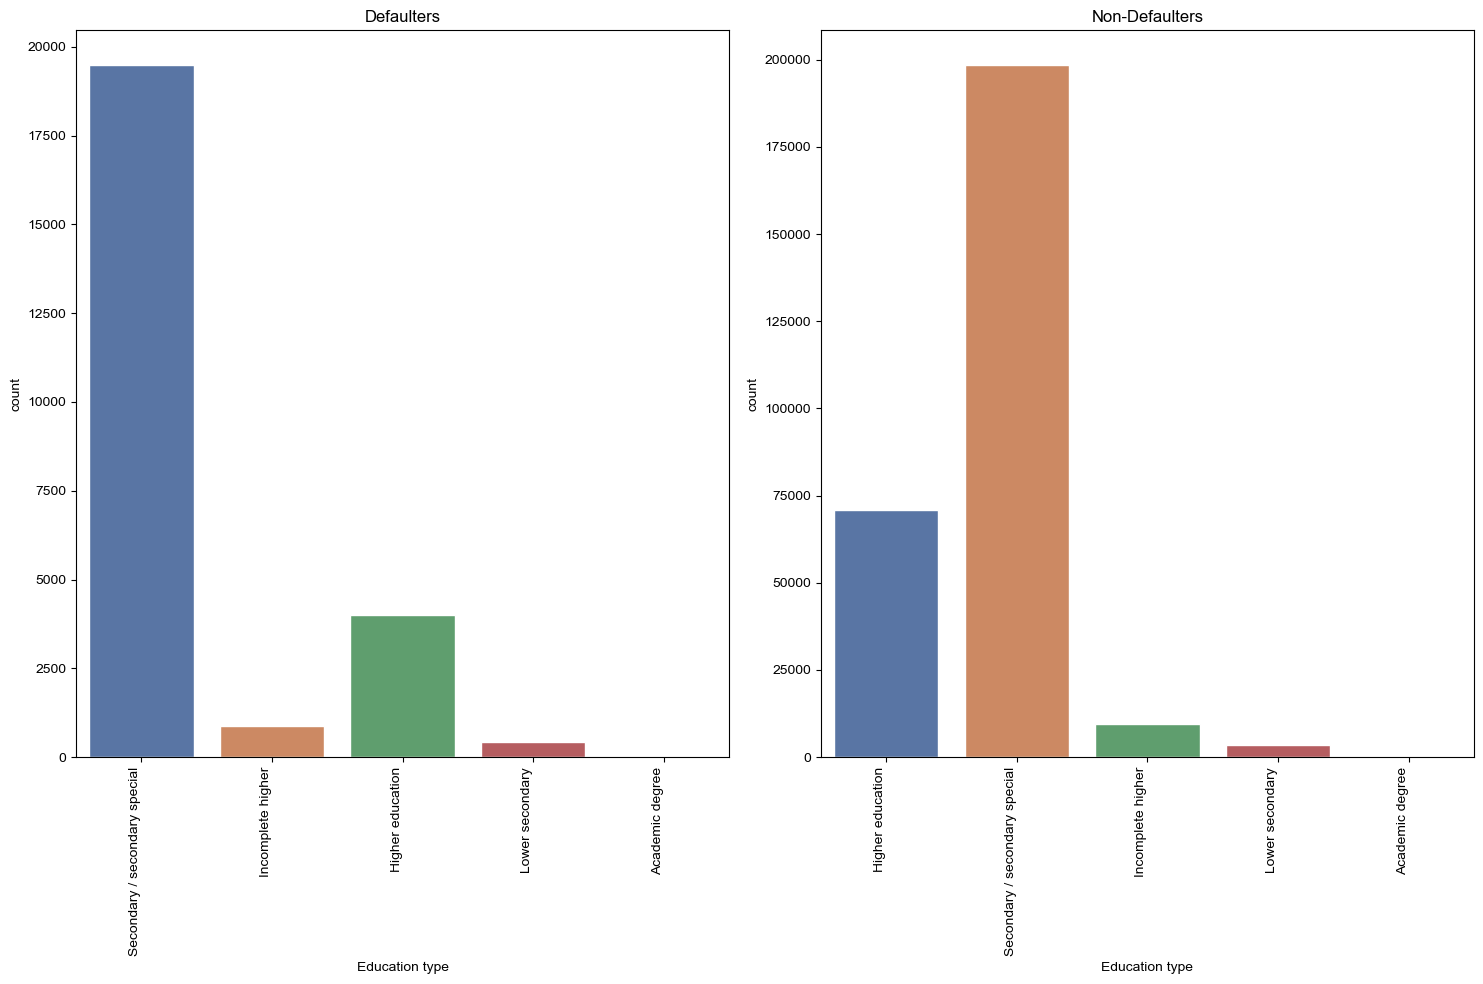

In [58]:
# Create a figure and subplots with 1 row and 2 columns, specifying the figure size
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Plot for Defaulters
sns.set_theme(style="whitegrid")  # Optional: Set the plot style
ax1 = sns.countplot(x='NAME_EDUCATION_TYPE', data=app_data_target_1, ax=axes[0])
ax1.set_title('Defaulters')  # Set the title for the first subplot
ax1.set_xlabel('Education type')  # Set the x-axis label for the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels

# Plot for Non-Defaulters
ax2 = sns.countplot(x='NAME_EDUCATION_TYPE', data=app_data_target_0, ax=axes[1])
ax2.set_title('Non-Defaulters')  # Set the title for the second subplot
ax2.set_xlabel('Education type')  # Set the x-axis label for the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of     eduacted poeple.
- Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

Based o Family status

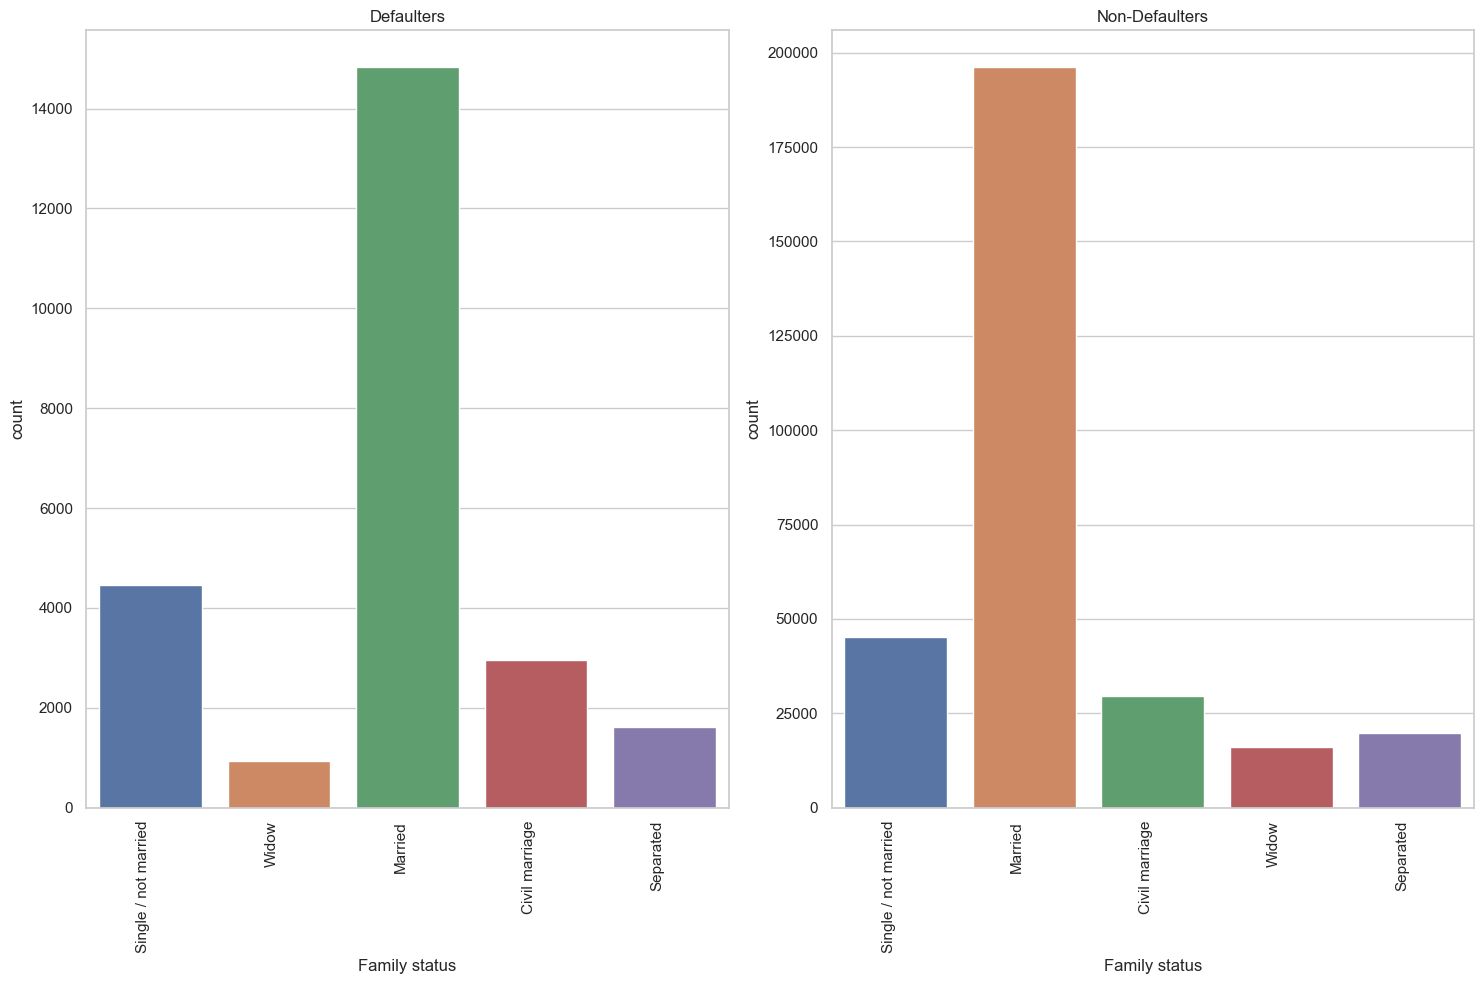

In [59]:
# Create a figure and subplots with 1 row and 2 columns, specifying the figure size
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Plot for Defaulters
ax1 = sns.countplot(x='NAME_FAMILY_STATUS', data=app_data_target_1, ax=axes[0])
ax1.set_title('Defaulters')  # Set the title for the first subplot
ax1.set_xlabel('Family status')  # Set the x-axis label for the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels

# Plot for Non-Defaulters
ax2 = sns.countplot(x='NAME_FAMILY_STATUS', data=app_data, ax=axes[1])
ax2.set_title('Non-Defaulters')  # Set the title for the second subplot
ax2.set_xlabel('Family status')  # Set the x-axis label for the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Conclusion:
- For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

Based on Gender

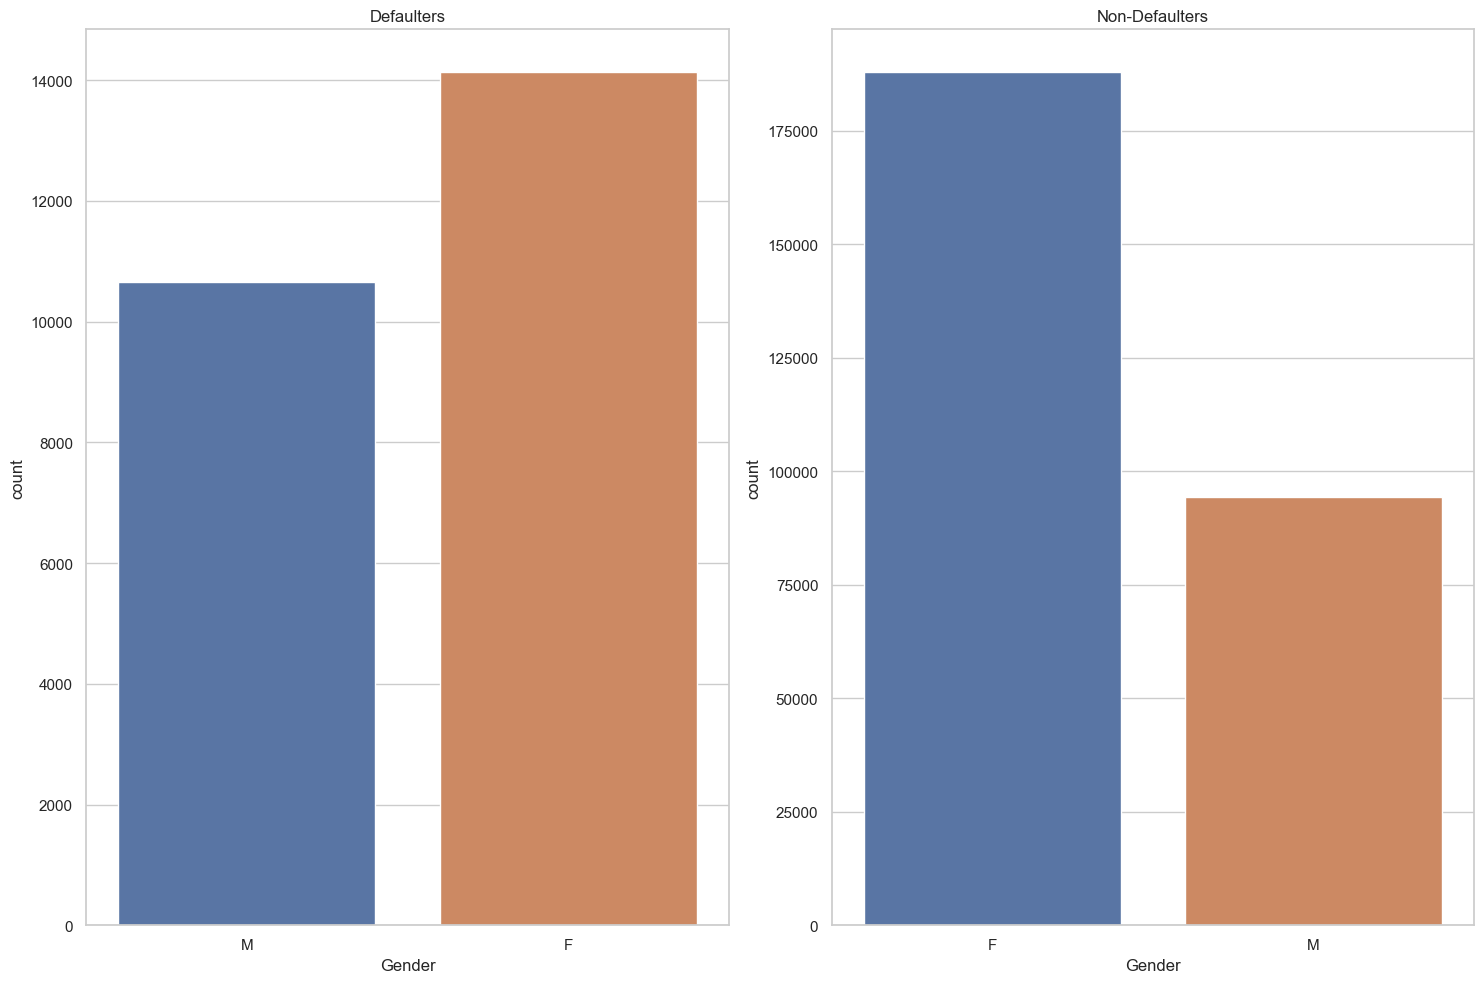

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Plot for Defaulters
sns.countplot(x='CODE_GENDER', data=app_data_target_1, ax=axes[0])
axes[0].set_title('Defaulters')
axes[0].set_xlabel('Gender')

# Plot for Non-Defaulters
sns.countplot(x='CODE_GENDER', data=app_data_target_0, ax=axes[1])
axes[1].set_title('Non-Defaulters')
axes[1].set_xlabel('Gender')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- Defaluters - It is clear that number of female defaulters are more than male defaulters.
- Non-defaluters - In Non-Defaulter females are higher than males.

### Defaulters and non-defaulters on the basis of Income type


Based on Income type

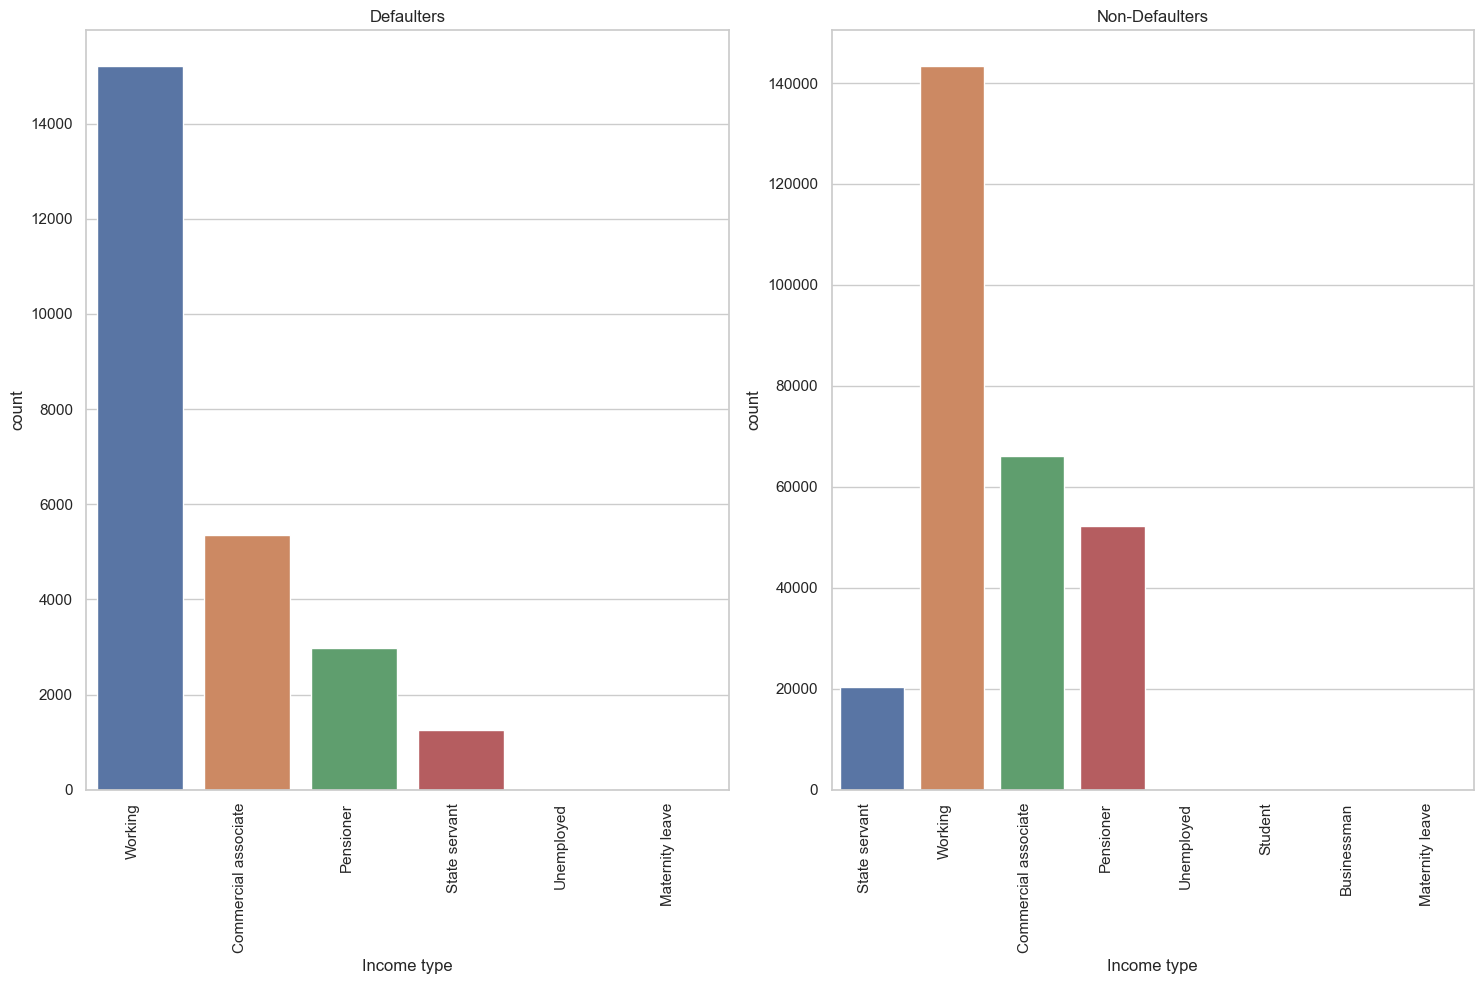

In [61]:
# Create subplots for Defaulters, specifying the figure size
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='NAME_INCOME_TYPE', data=app_data_target_1)
ax1.set_title('Defaulters')
ax1.set(xlabel='Income type')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')

# Create subplots for Non-Defaulters, specifying the figure size
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='NAME_INCOME_TYPE', data=app_data_target_0)
ax2.set_title('Non-Defaulters')
ax2.set(xlabel='Income type')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:

- Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
- Non-defaulters - Similarly here also working people are more in number who are not defaulted.

In [62]:
app_data.columns
app_data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

Defaulters and non-defaulters on the basis of Loan type

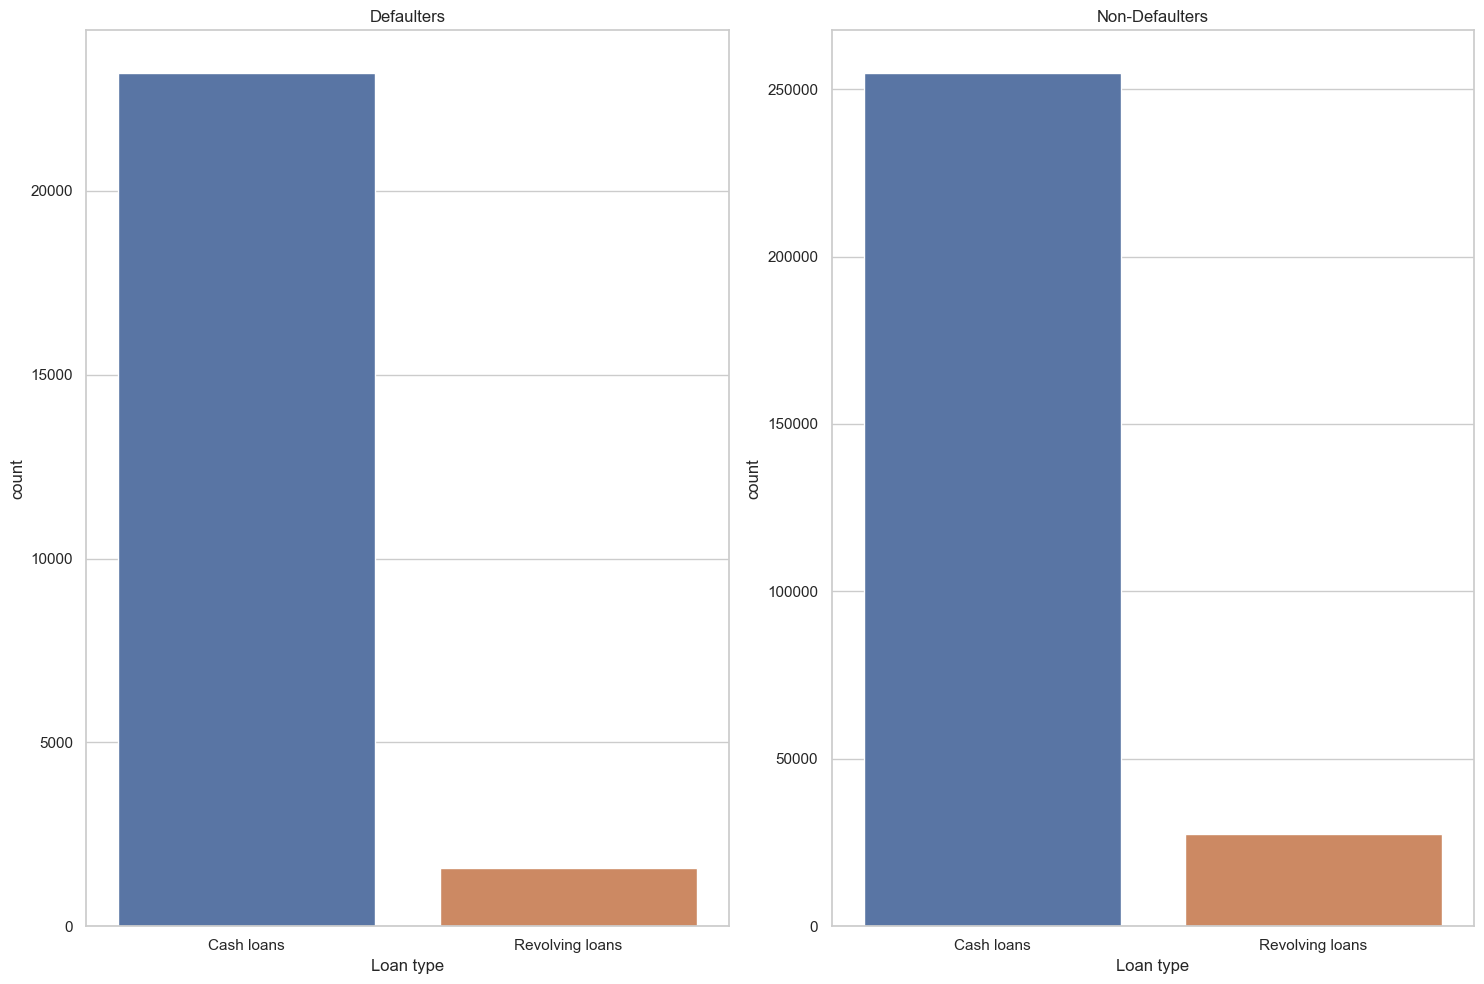

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Plot for Defaulters
sns.countplot(x='NAME_CONTRACT_TYPE', data=app_data_target_1, ax=axes[0])
axes[0].set_title('Defaulters')  # Set the title for the first subplot
axes[0].set_xlabel('Loan type')  # Set the x-axis label for the first subplot

# Plot for Non-Defaulters
sns.countplot(x='NAME_CONTRACT_TYPE', data=app_data_target_0, ax=axes[1])
axes[1].set_title('Non-Defaulters')  # Set the title for the second subplot
axes[1].set_xlabel('Loan type')  # Set the x-axis label for the second subplot

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- We see in both the cases that Revolving loans are very less in number compared to Cash loans.

### Univariate analysis(For numerical variables)


In [64]:
numerical_columns.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0      24700.5         351000.0                    0.018801            -2120   
1      35698.5        1129500.0                    0.003541             -291   
2       6750.0         135000.0                    0.010032            -2531   
3      29686.5         297000.0                    0.008019            -2437   
4      21865.5         513000.0                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  EXT_SOURCE_SCORE  \
0                           0                           0              0.20   
1                           0                           0              0.57   
2                           0                           0              0.64   
3                           0                           0              0.58   
4                           0                           0              0.42   

   AGE  
0   26  
1   46  
2   53  
3   53  
4   55

Based on Age

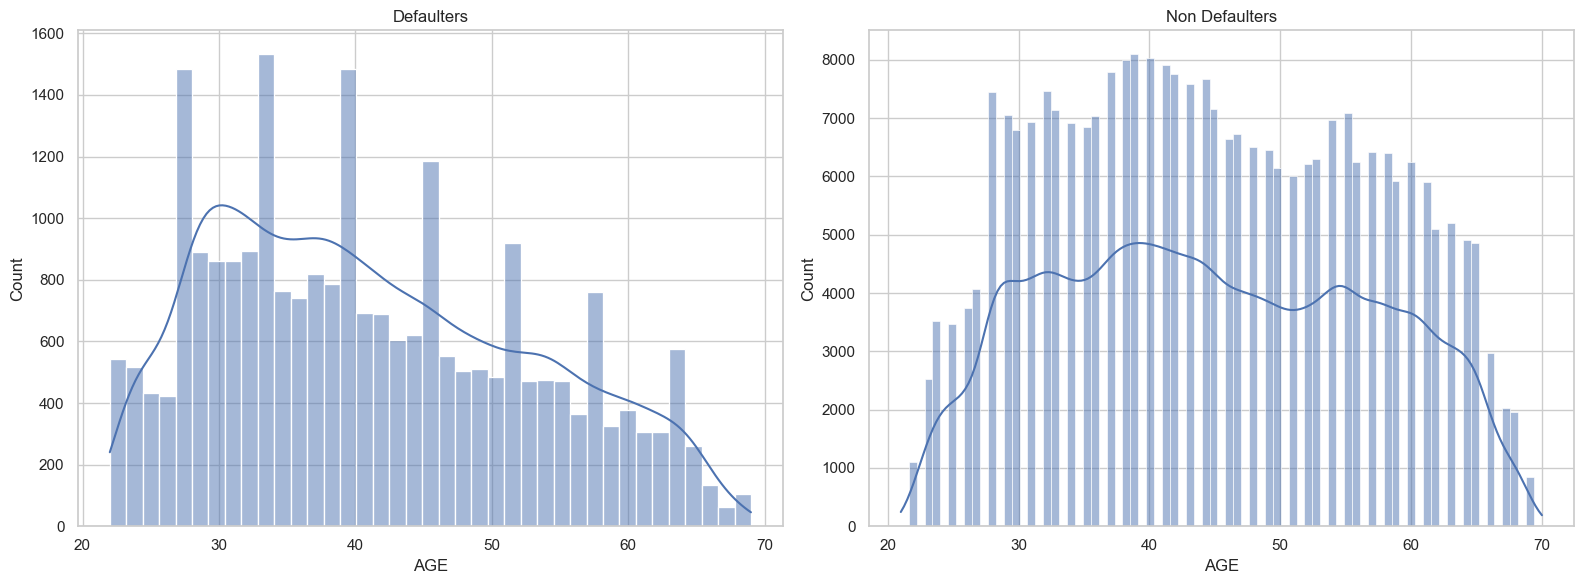

In [65]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Defaulters
sns.histplot(app_data_target_1['AGE'], kde=True, ax=axes[0])
axes[0].set_title('Defaulters')
axes[0].set_xlabel('AGE')

# Plot for Non-Defaulters
sns.histplot(app_data_target_0['AGE'], kde=True, ax=axes[1])
axes[1].set_title('Non Defaulters')
axes[1].set_xlabel('AGE')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
-  Younger applicants have a higher risk of defaulting on loans

Based on loan annuity

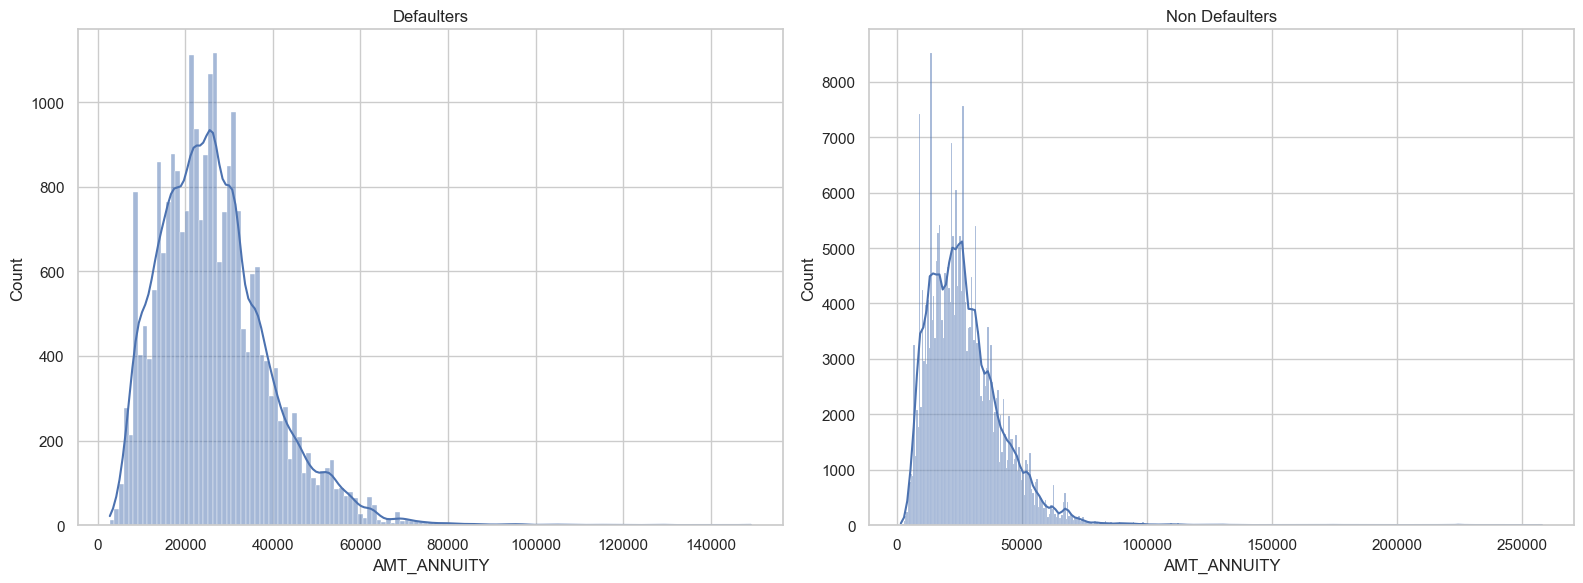

In [66]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Defaulters
sns.histplot(app_data_target_1['AMT_ANNUITY'], kde=True, ax=axes[0])
axes[0].set_title('Defaulters')
axes[0].set_xlabel('AMT_ANNUITY')

# Plot for Non-Defaulters
sns.histplot(app_data_target_0['AMT_ANNUITY'], kde=True, ax=axes[1])
axes[1].set_title('Non Defaulters')
axes[1].set_xlabel('AMT_ANNUITY')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- From the distribution plot above, we can observe that, in both scenarios, the majority of loan annuities are centered between the range of 10,000 to 40,000.

Based on Cerdit proved

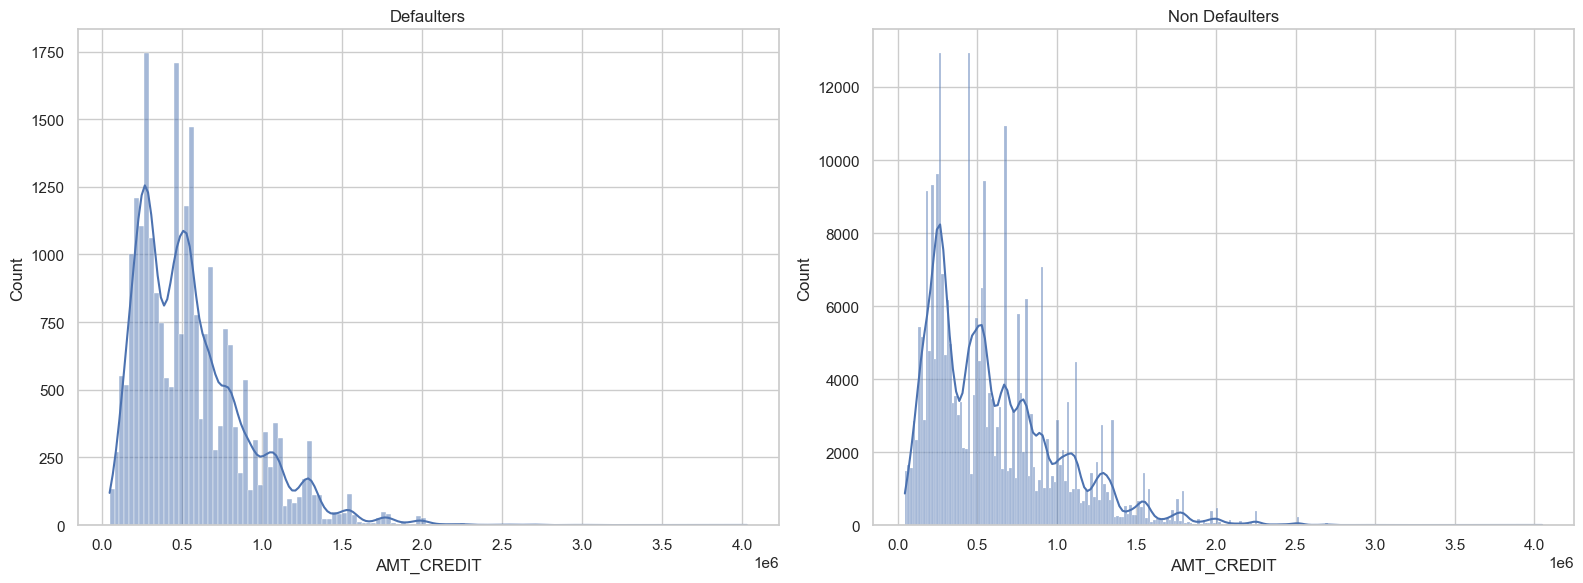

In [67]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Defaulters
sns.histplot(app_data_target_1['AMT_CREDIT'], kde=True, ax=axes[0])
axes[0].set_title('Defaulters')
axes[0].set_xlabel('AMT_CREDIT')

# Plot for Non-Defaulters
sns.histplot(app_data_target_0['AMT_CREDIT'], kde=True, ax=axes[1])
axes[1].set_title('Non Defaulters')
axes[1].set_xlabel('AMT_CREDIT')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
-  We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is                  till 500000.
-  If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being                      decreased with the loan credit amount.

### Segmented Univariate analysis (for ordered categorical variables)


In [68]:
# Calculating percentage of AGE_GROUP
app_data_young_1=round(100*len(app_data[(app_data['AGE_GROUP'] == 'Young') & (app_data['TARGET']==1)])/len(app_data[app_data['AGE_GROUP'] == 'Young']),2)

app_data_adult_1=round(100*len(app_data[(app_data['AGE_GROUP']=='Adult') & (app_data['TARGET']==1)])/len(app_data[app_data['AGE_GROUP']=='Adult']),2)

app_data_Senior_citizen_1=round(100*len(app_data[(app_data['AGE_GROUP'] == 'Senior citizen') & (app_data['TARGET'] == 1)])/len(app_data[app_data['AGE_GROUP'] == 'Senior citizen']),2)

In [69]:
# Generating a separate dataframe of the percentage of defaulted age group 
age_group_default = {'AGE_GROUP':['Young', 'Adult', 'Senior citizen'], '%':[app_data_young_1, app_data_adult_1, app_data_Senior_citizen_1]} 
app_data_agegroup_default = pd.DataFrame(age_group_default) 
app_data_agegroup_default

AGE_GROUP      %
0           Young  10.40
1           Adult   7.07
2  Senior citizen   5.04

In [70]:
app_data_young_0=round(100*len(app_data[(app_data['AGE_GROUP'] == 'Young') & (app_data['TARGET']==0)])/len(app_data[app_data['AGE_GROUP'] == 'Young']),2)

app_data_adult_0=round(100*len(app_data[(app_data['AGE_GROUP']=='Adult') & (app_data['TARGET']==0)])/len(app_data[app_data['AGE_GROUP']=='Adult']),2)

app_data_Senior_citizen_0=round(100*len(app_data[(app_data['AGE_GROUP'] == 'Senior citizen') & (app_data['TARGET'] == 0)])/len(app_data[app_data['AGE_GROUP'] == 'Senior citizen']),2)


In [71]:
agegroup_ndefault = {'AGE_GROUP':['Young', 'Adult', 'Senior citizen'], '%':[app_data_young_0,app_data_adult_0,app_data_Senior_citizen_0]} 
df_agegroup_ndefault = pd.DataFrame(agegroup_ndefault) 
df_agegroup_ndefault

AGE_GROUP      %
0           Young  89.60
1           Adult  92.93
2  Senior citizen  94.96

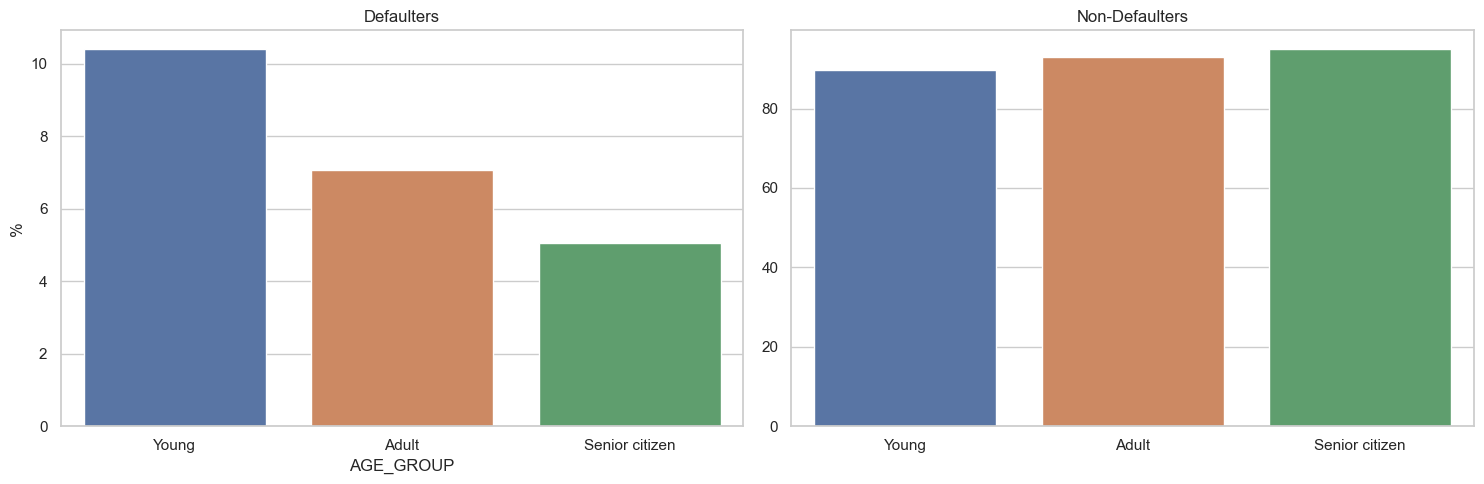

In [72]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Defaulters
sns.barplot(x='AGE_GROUP', y='%', data=app_data_agegroup_default, ax=axes[0])
axes[0].set_title('Defaulters')

# Plot for Non-Defaulters
sns.barplot(x='AGE_GROUP', y='%', data=agegroup_ndefault, ax=axes[1])
axes[1].set_title('Non-Defaulters')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- Young peoples are more defaulter as compared to other groups and Senior citizens are less likely to default, so it is safer to   give loan to Senior citizens
- Even though all groups in Non-defaulter are similar but Senior citizens are more in percentage of Non-defaulter

## Normalized score from ext data source


In [73]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  \
0  House / apartment                    0.018801            -2120   
1  House / apartment                    0.003541             -291   
2  House / apartment                    0.010032            -2531   
3  House / apartment                    0.008019            -2437   
4  House / apartment                    0.028663            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

  AMT_REQ_CREDIT_BUREAU_QRT  EXT_SOURCE_SCORE  AGE AGE_GROUP INCOME_GROUP  \
0                       0.0              0.20   26     Young         High   
1                       0.0              0.57   46     Adult         High   
2                       0.0              0.64   53     Adult          Low   
3                       0.0              0.58   53     Adult       Medium   
4                       0.0              0.42   55     Adult       Medium   

  CREDIT_GROUP  
0          Low  
1         High  
2          Low  
3          Low  
4       Medium

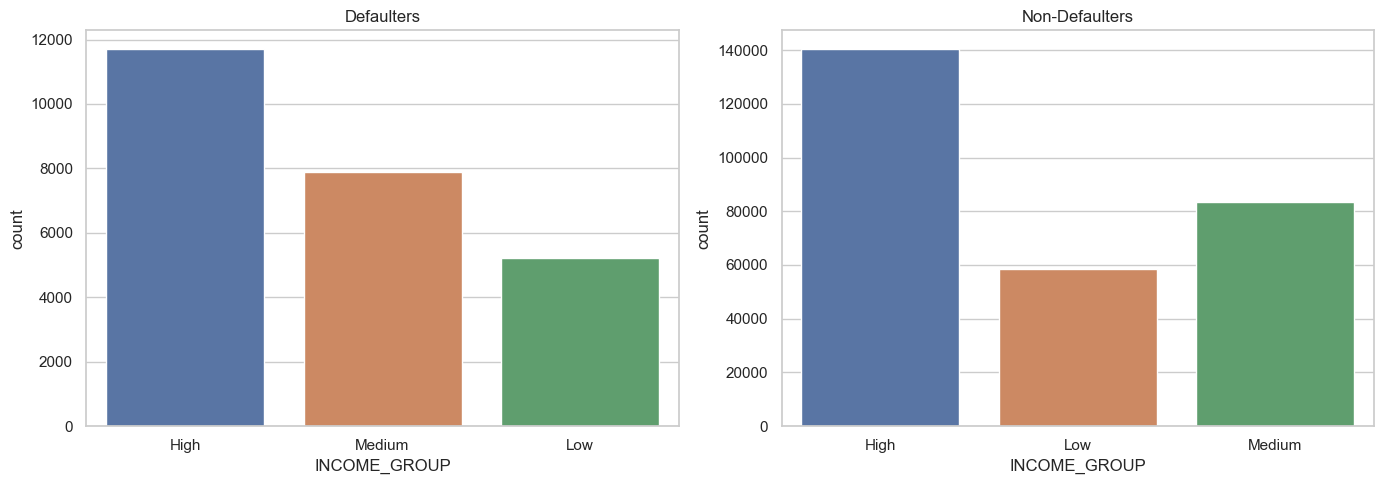

In [74]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Defaulters
sns.countplot(x='INCOME_GROUP', data=app_data_target_1, ax=axes[0])
axes[0].set_title('Defaulters')

# Plot for Non-Defaulters
sns.countplot(x='INCOME_GROUP', data=app_data_target_0, ax=axes[1])
axes[1].set_title('Non-Defaulters')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Conclusion:
- People who have high income are more defaulter than Medium and Low
- Count of non defaulters are more in High income group

### Bivariate analysis on categorical variable

In [75]:
# Category list
categorical_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'INCOME_GROUP', 'CREDIT_GROUP'],
      dtype='object')

### For defaulters

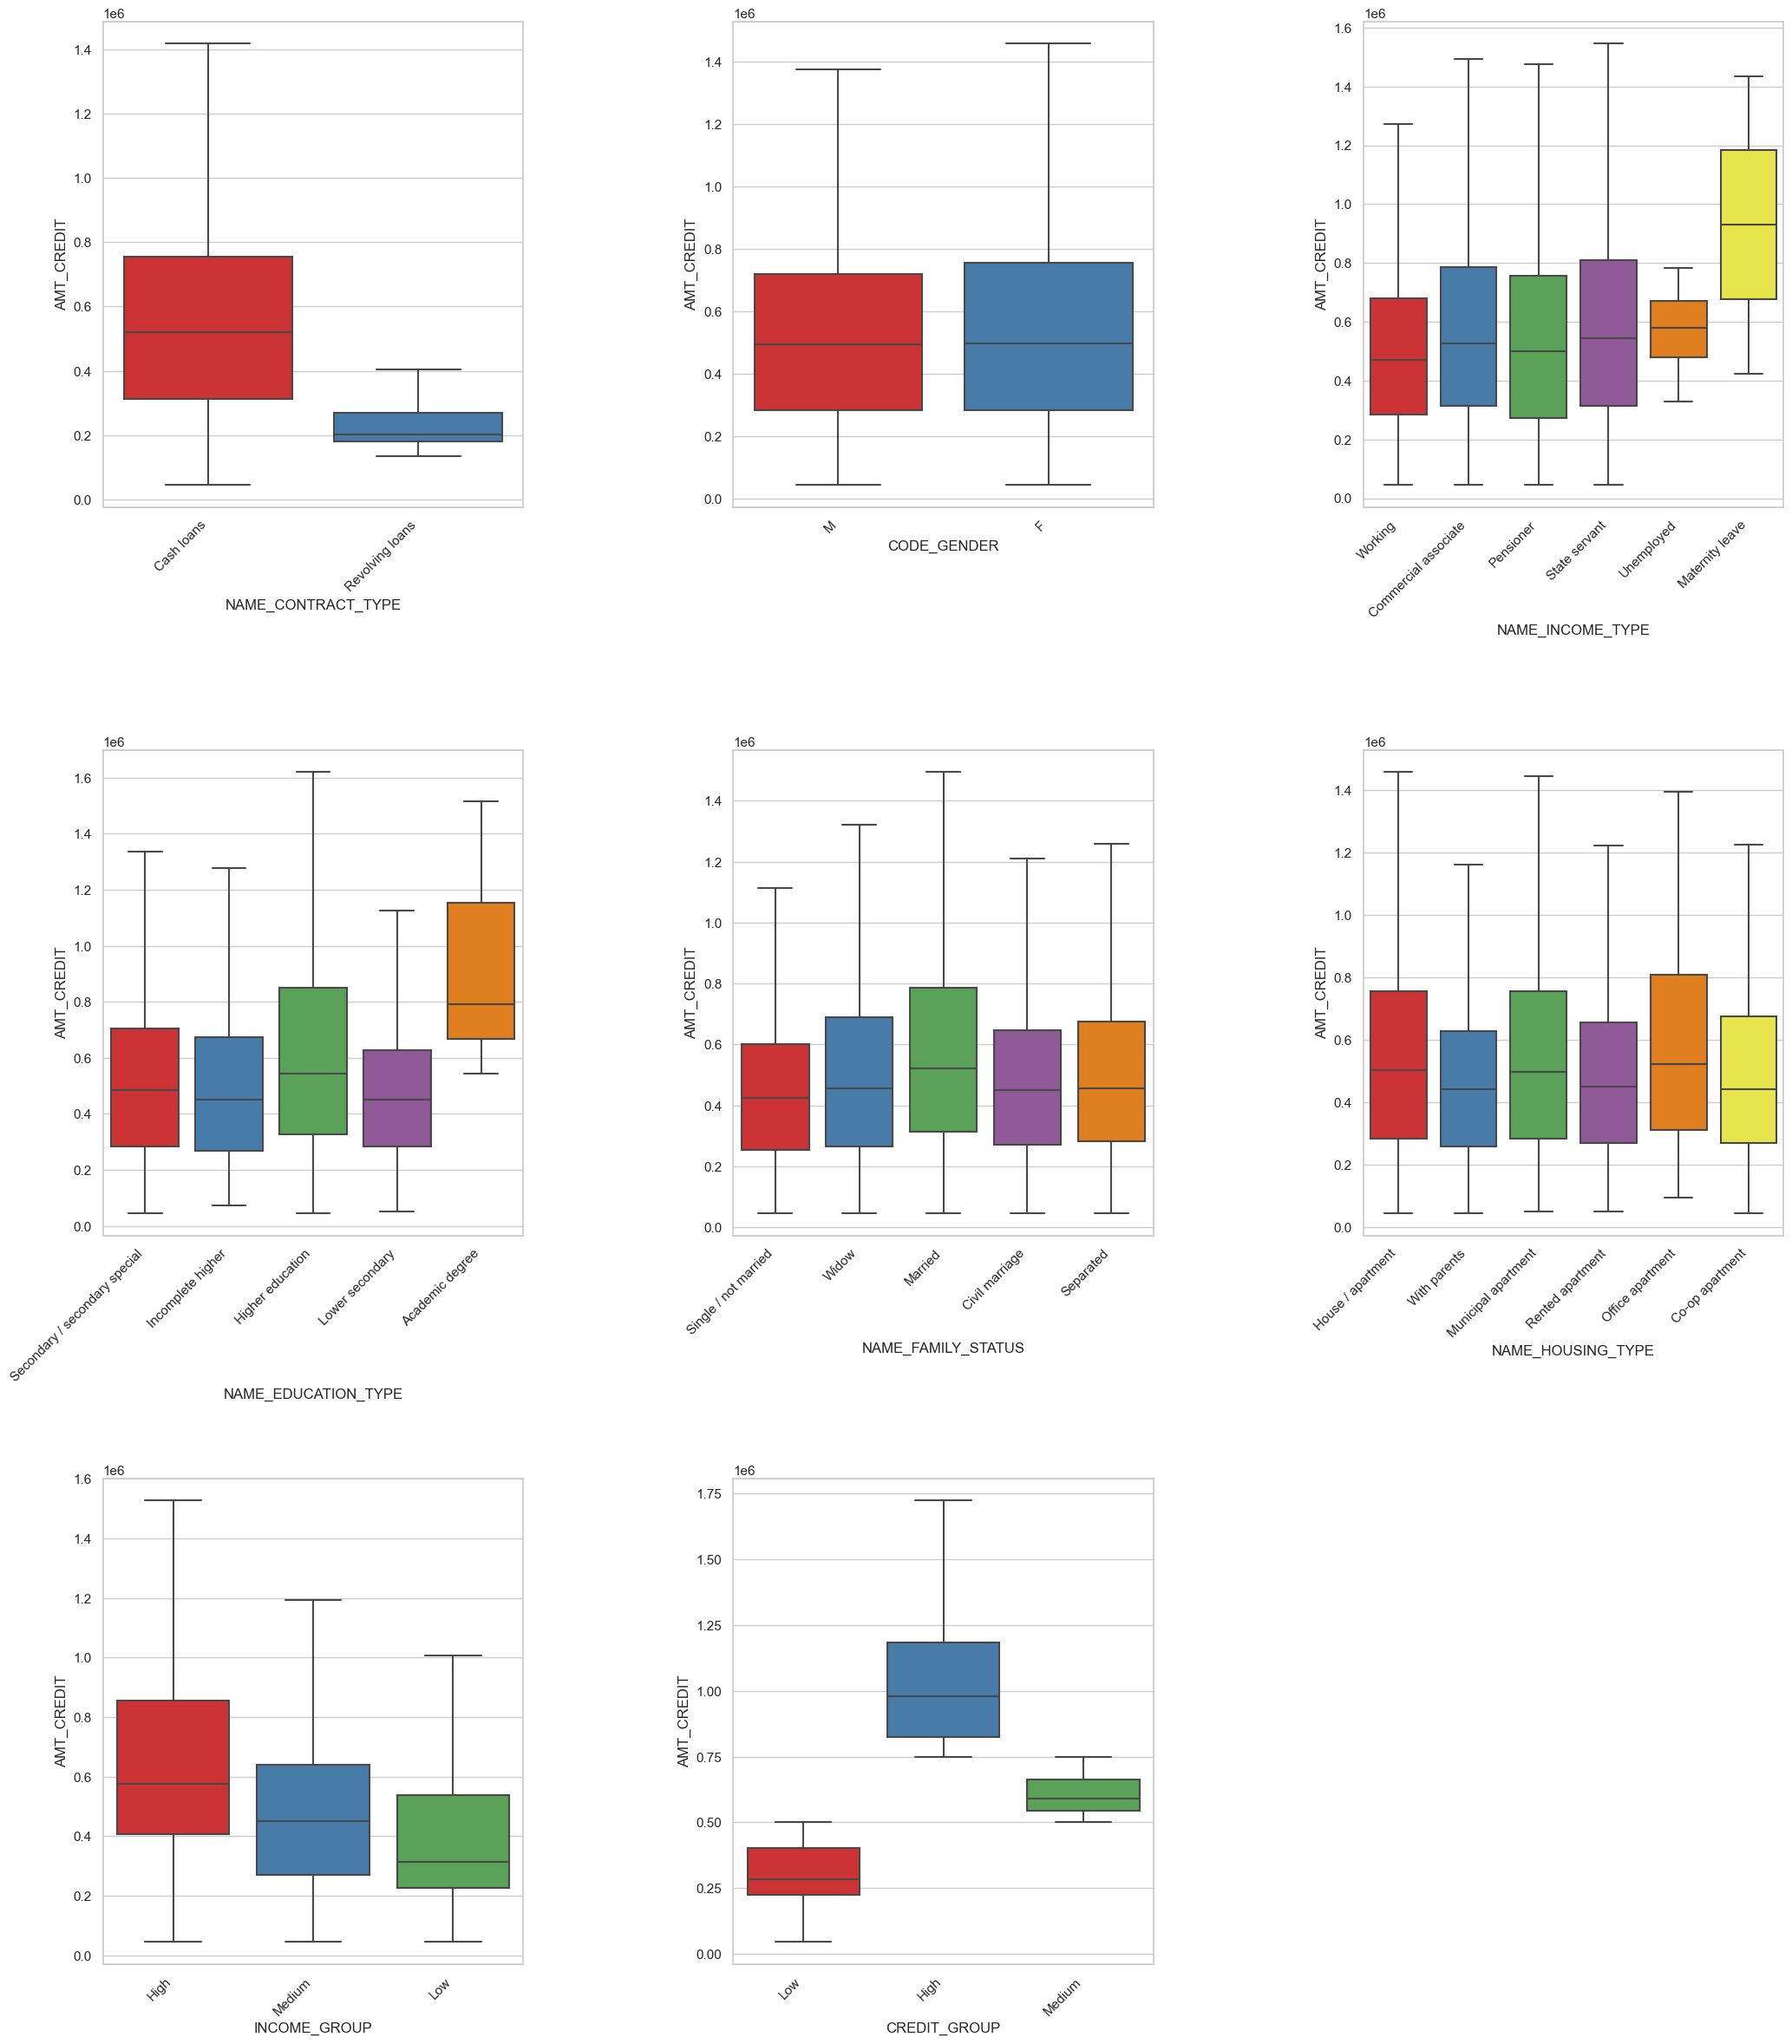

In [76]:
# Set figure size and create subplots with proper spacing
plt.figure(figsize=(25, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through categorical columns
k = 0
for category in categorical_columns:
    k = k + 1
    ax = plt.subplot(4, 3, k)
    sns.boxplot(x=category, y='AMT_CREDIT', data=app_data_target_1, showfliers=False, palette='Set1')
    plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
    plt.xlabel(category)  # Set x-axis label for each subplot

# Display the plot
plt.show()

### Conslusion:
- For Revolving loans Credit amount of the loans are very low
- Between genders, client owning cars or realty, there is no credit amount differnce 
- Compared to mid age and senior citizen, the Young age group got less amount of loan credited 
- More loan amount credited for Higher income group 
- More loan amount is for Clients having higher external score

### For Non-Defaulters

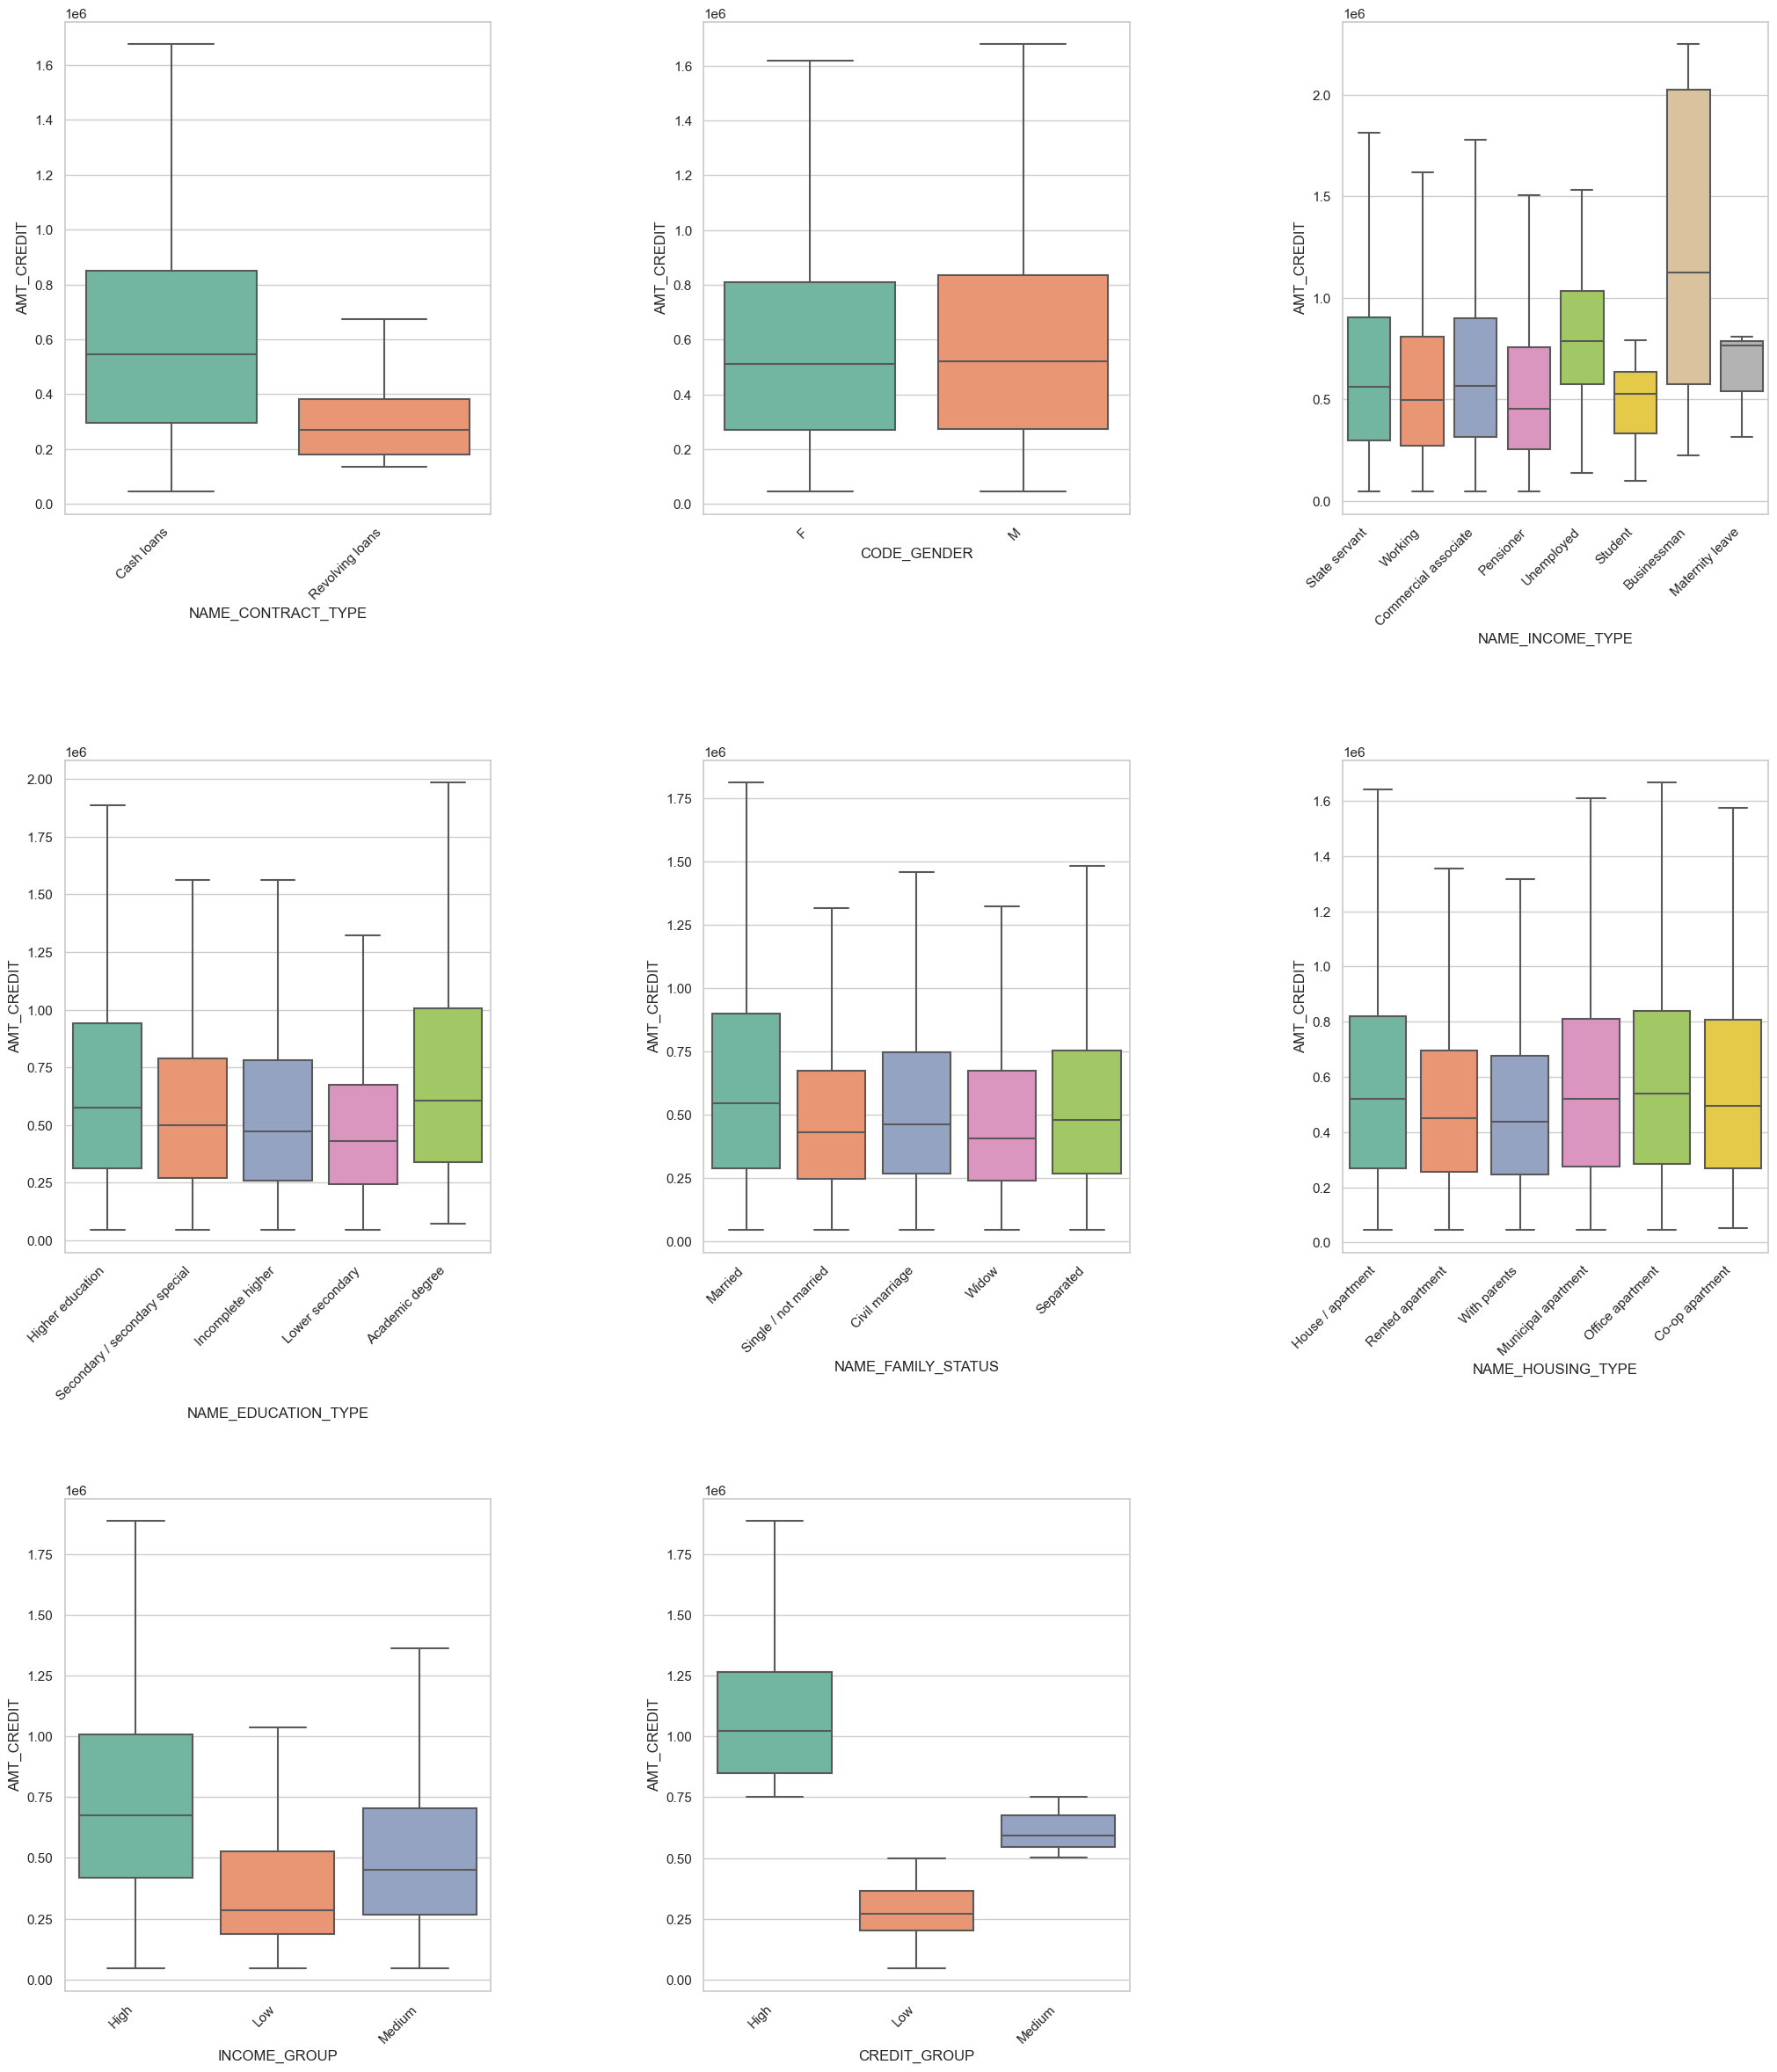

In [77]:
# Set figure size and create subplots with proper spacing
plt.figure(figsize=(25, 40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop through categorical columns
k = 0
for category in categorical_columns:
    k = k + 1
    ax = plt.subplot(4, 3, k)
    sns.boxplot(x=category, y='AMT_CREDIT', data=app_data_target_0, showfliers=False, palette='Set2')
    plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
    plt.xlabel(category)  # Set x-axis label for each subplot

# Display the plot
plt.show()

### Conslusion:
- For Revolving loans Credit amount of the loans are very low
- Between genders, client owning cars or realty, there is no credit amount differnce.
- Compared to young and senior citizen, the mid age group got more amount of loan credited
- Higher income group have more loan amount credited and lower the lowest
- Clients with higher external score have more loan amount
- Unemployed people have spike in credit amount of loan
- More loan amount credited by the Married people have

### For segmented columns

<Figure size 800x500 with 0 Axes>

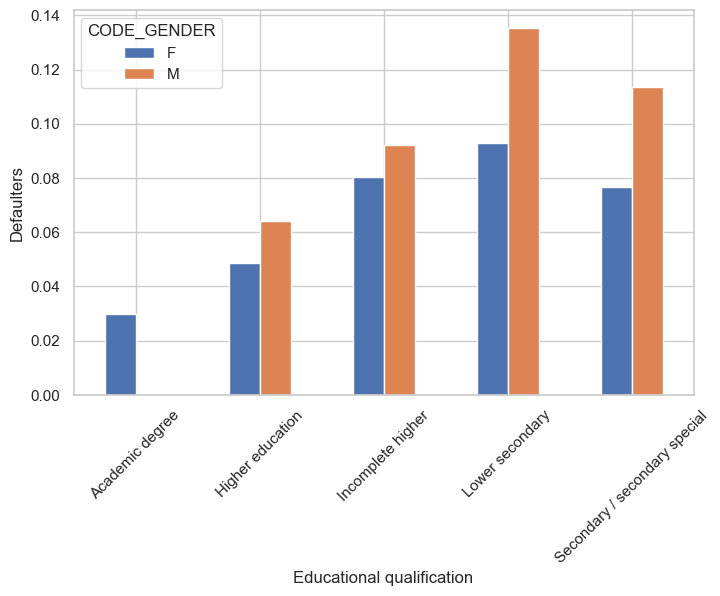

In [78]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 5), rot=45)

# Set labels
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Lower secondary educated clients are more defaulted followed by Secondary and Incomplete higher educated clients
- Less defaulted are the Higher educated people
- Accross all educated level Females are less defaulted than male

<Figure size 800x600 with 0 Axes>

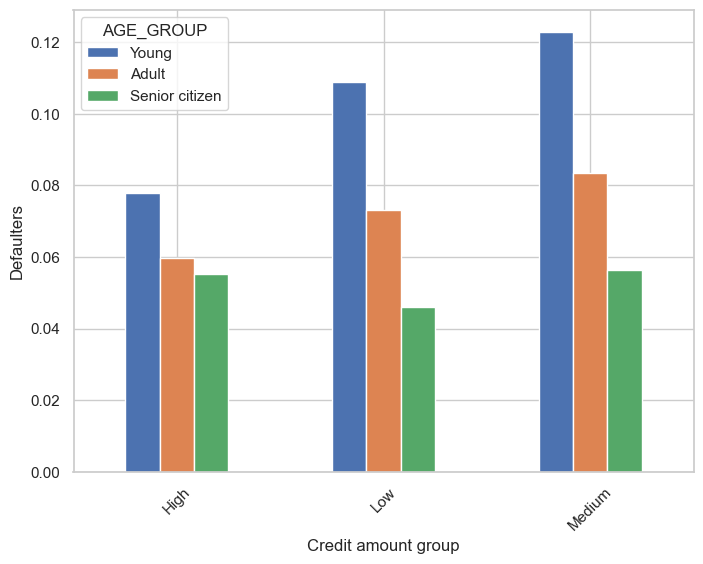

In [79]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='CREDIT_GROUP', columns='AGE_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 6), rot=45)

# Set labels
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Highly defaulted are Young clients with medium and low credit amount group
- Less likely defaulted are Senior citizens across all credit amount groups

<Figure size 800x600 with 0 Axes>

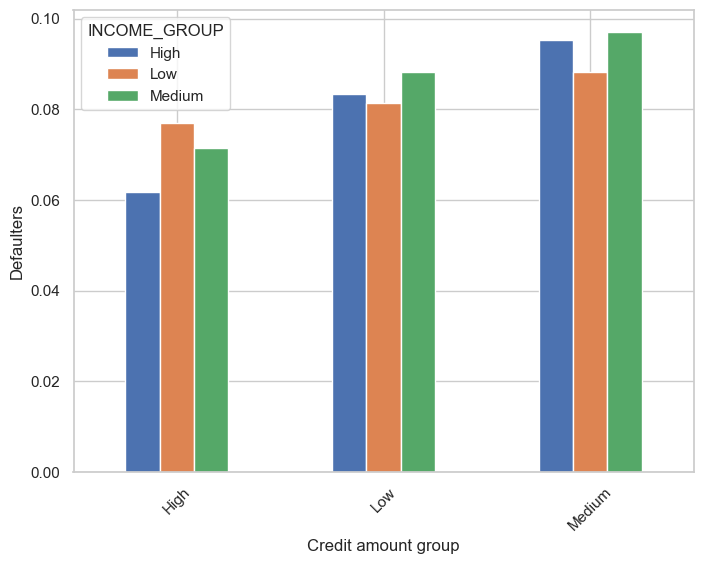

In [80]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='CREDIT_GROUP', columns='INCOME_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 6), rot=45)

# Set labels
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Highly defaulted in all income groups are Medium credit amount group
- In all income groups High credit amount groups are less likely to default

<Figure size 800x500 with 0 Axes>

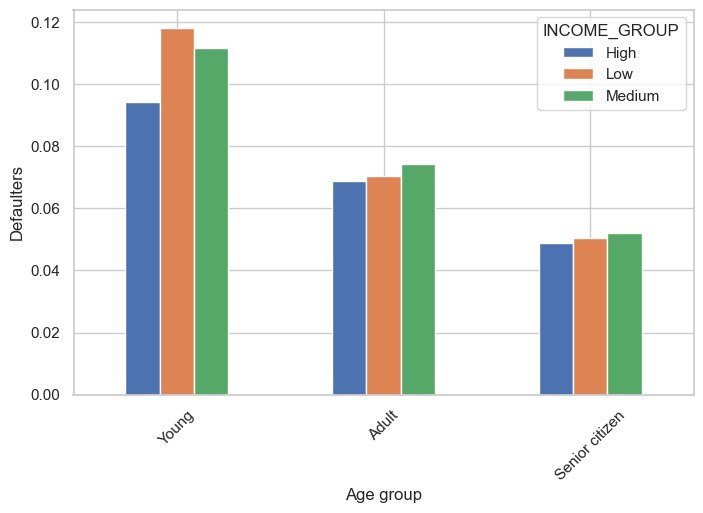

In [81]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='AGE_GROUP', columns='INCOME_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 5), rot=45)

# Set labels
plt.xlabel('Age group')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Young clients are more defaulted than Mid age and senior
- Young low income people are more defaulted
- Default rate is almost same in all income group for Mid age and senior people

<Figure size 800x600 with 0 Axes>

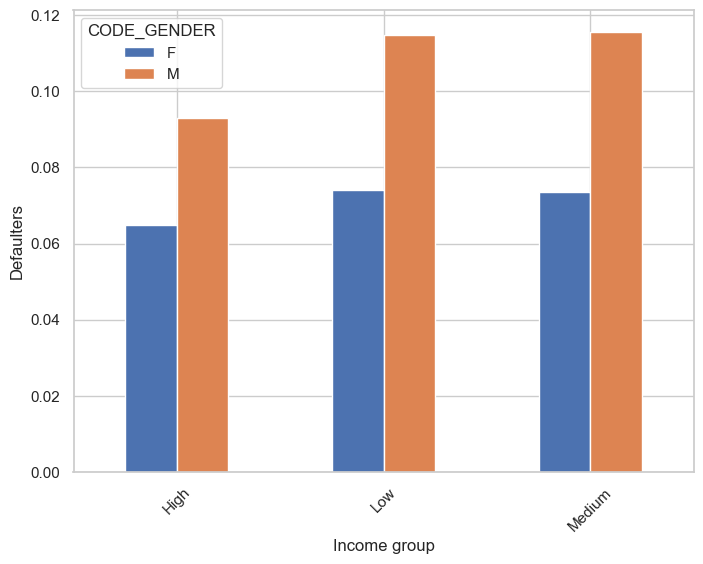

In [82]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='INCOME_GROUP', columns='CODE_GENDER', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 6), rot=45)

# Set labels
plt.xlabel('Income group')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusiom:
- We can see that Males are more likely defaulted than Females accross all income groups.

<Figure size 800x700 with 0 Axes>

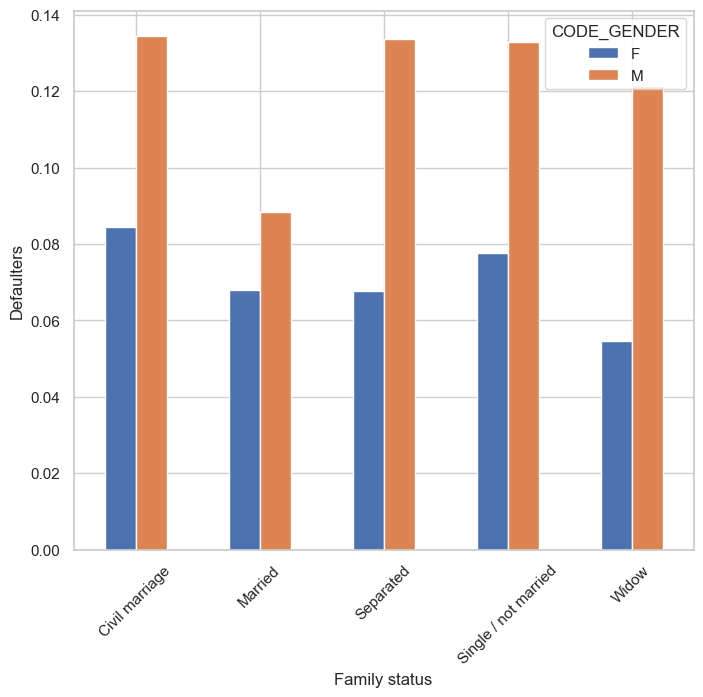

In [83]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='NAME_FAMILY_STATUS', columns='CODE_GENDER', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 7))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 7), rot=45)

# Set labels
plt.xlabel('Family status')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Across all family status the Male clients are more defaulted than Female.

<Figure size 800x700 with 0 Axes>

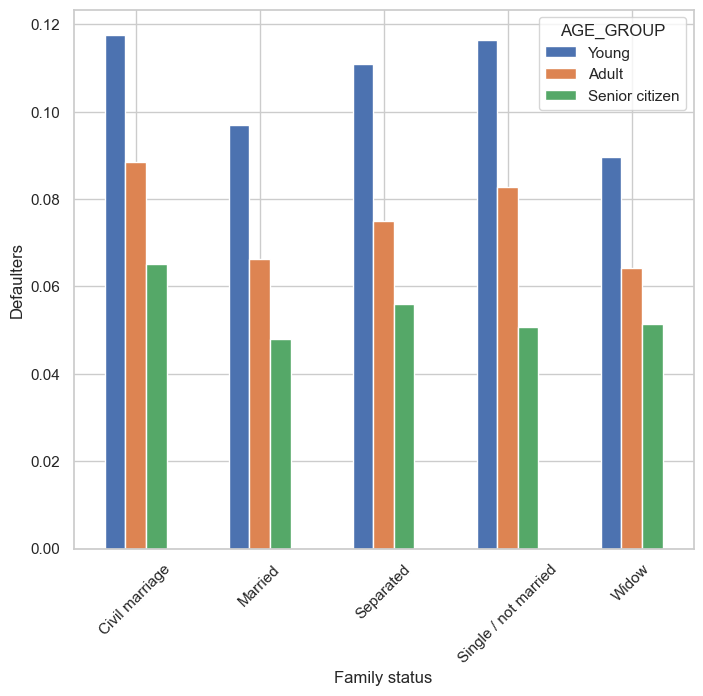

In [84]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='NAME_FAMILY_STATUS', columns='AGE_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 7))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 7), rot=45)

# Set labels
plt.xlabel('Family status')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusiom: 
- Across all family status the Young clients are more defaulted and Senior citizen are less.

<Figure size 800x500 with 0 Axes>

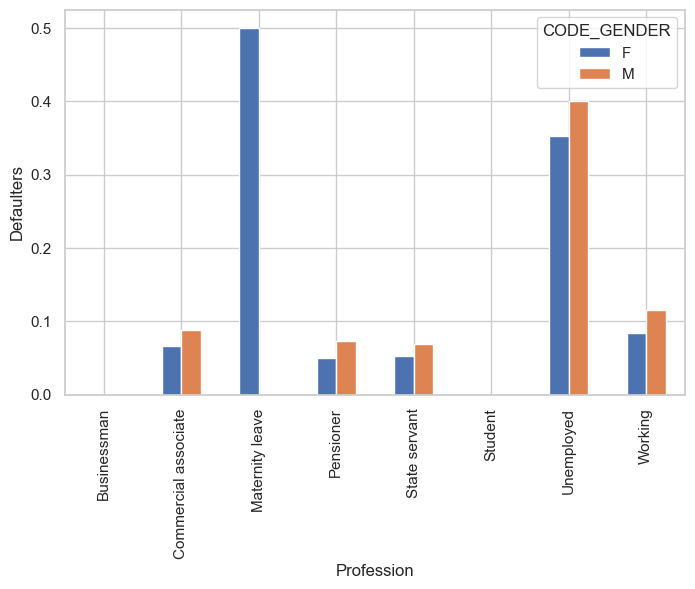

In [85]:
# Create a pivot table
pivot_table_data = app_data.pivot_table(values='TARGET', index='NAME_INCOME_TYPE', columns='CODE_GENDER', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the bar chart
pivot_table_data.plot(kind='bar', figsize=(8, 5), rot=90)

# Set labels
plt.xlabel('Profession')
plt.ylabel('Defaulters')

# Show the plot
plt.show()


### Conclusion:
- Unemployed clients are more defaulted
- Clients with maternity leave are expected to be defaulted more
- In all other professions the default rate is lesser
- Males are more defaulted with their respective professions compared to females

### Bivariate analysis on continious variable

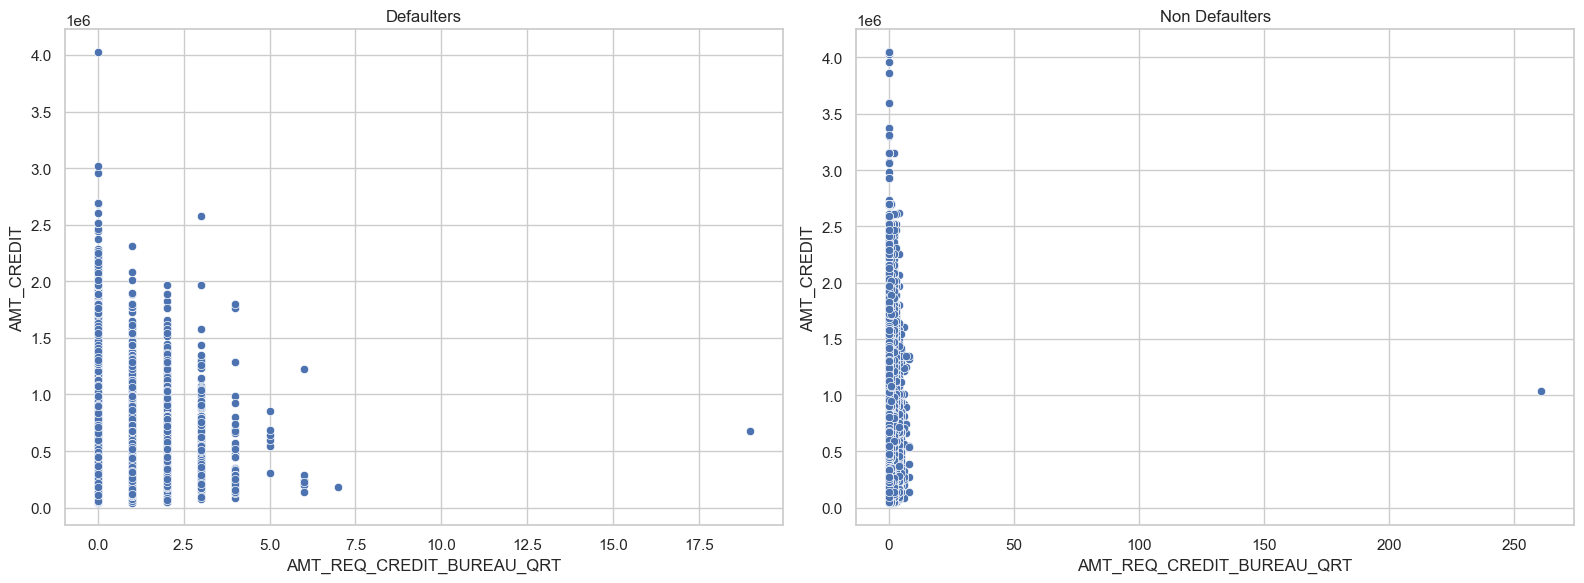

In [86]:
# Set figure size and create subplots
plt.figure(figsize=(16, 6))

# Plot for Defaulters
plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT', y='AMT_CREDIT', data=app_data_target_1)
plt.title('Defaulters')

# Plot for Non-Defaulters
plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT', y='AMT_CREDIT', data=app_data_target_0)
plt.title('Non Defaulters')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Conclusion:
- Less amount of loan credited for the more number of enquiries

## Correlation among related coulmns

In [87]:
# creating mew variable from numerical_columns and dropping unrelated columns
updated_numerical_columns=numerical_columns.drop(['SK_ID_CURR','CNT_CHILDREN','REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'],axis=True)
# corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']
updated_numerical_columns.head()

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0       1          202500.0    406597.5      24700.5         351000.0   
1       0          270000.0   1293502.5      35698.5        1129500.0   
2       0           67500.0    135000.0       6750.0         135000.0   
3       0          135000.0    312682.5      29686.5         297000.0   
4       0          121500.0    513000.0      21865.5         513000.0   

   REGION_RATING_CLIENT  EXT_SOURCE_SCORE  AGE  
0                     2              0.20   26  
1                     1              0.57   46  
2                     2              0.64   53  
3                     2              0.58   53  
4                     2              0.42   55

In [88]:
updated_numerical_columns.corr()

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
TARGET                1.000000         -0.003940   -0.030380    -0.012779   
AMT_INCOME_TOTAL     -0.003940          1.000000    0.156652     0.191440   
AMT_CREDIT           -0.030380          0.156652    1.000000     0.769953   
AMT_ANNUITY          -0.012779          0.191440    0.769953     1.000000   
AMT_GOODS_PRICE      -0.039635          0.159536    0.986970     0.775128   
REGION_RATING_CLIENT  0.058931         -0.085436   -0.101812    -0.128552   
EXT_SOURCE_SCORE     -0.214492          0.024031    0.117681     0.106202   
AGE                  -0.078380         -0.027312    0.055022    -0.009980   

                      AMT_GOODS_PRICE  REGION_RATING_CLIENT  EXT_SOURCE_SCORE  \
TARGET                      -0.039635              0.058931         -0.214492   
AMT_INCOME_TOTAL             0.159536             -0.085436          0.024031   
AMT_CREDIT                   0.986970             -0.101812          0.117681   
AMT_ANNUITY                  0.775128             -0.128552          0.106202   
AMT_GOODS_PRICE              1.000000             -0.103830          0.125835   
REGION_RATING_CLIENT        -0.103830              1.000000         -0.213675   
EXT_SOURCE_SCORE             0.125835             -0.213675          1.000000   
AGE                          0.053358             -0.009590          0.181457   

                           AGE  
TARGET               -0.078380  
AMT_INCOME_TOTAL     -0.027312  
AMT_CREDIT            0.055022  
AMT_ANNUITY          -0.009980  
AMT_GOODS_PRICE       0.053358  
REGION_RATING_CLIENT -0.009590  
EXT_SOURCE_SCORE      0.181457  
AGE                   1.000000

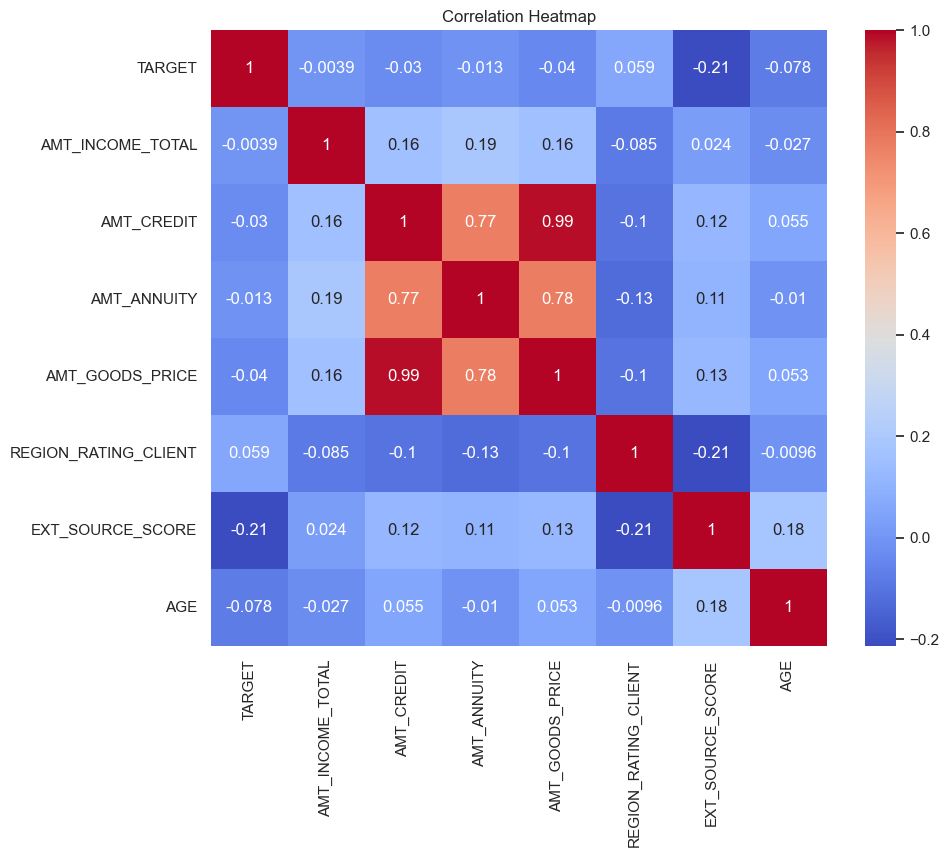

In [89]:
# Set figure size
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_matrix = updated_numerical_columns.corr()

# Plot heatmap with changed cmap value
sns.heatmap(data=corr_matrix, cmap="coolwarm", annot=True, square=True)

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


### Conclusion:
The highly correlated columns are:
- AMT_CREDIT and AMT_ANNUITY (0.77)
- AMT_CREDIT and AMT_GOODS_PRICE (0.99)
- AMT_ANNUITY and AMT_GOODS_PRICE (0.78)

# Previous application

In [90]:
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [91]:
prev_app.shape

(1670214, 37)

In [92]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [93]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [94]:
# Calculating total null values in each columns
prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [95]:
# Calculating percentage of null values in each column
prev_app.isnull().sum()*100/len(prev_app)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Treating columns

In [96]:
# There are some column with 'XNA' and 'XAP' , so treating them
prev_app.replace(['XNA', 'XAP'], -999, inplace=True)

In [97]:
# Calculate the percentage of missing values for each column
missing_percentage = (prev_app.isnull().sum() / len(prev_app)) * 100

# Get columns with more than 30% missing values
prev_app_missing = missing_percentage[missing_percentage >= 30].index.tolist()

# Output the list of columns
prev_app_missing


['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [98]:
prev_app = prev_app.drop(prev_app_missing,axis=1)
prev_app.shape

(1670214, 26)

In [99]:
# List of all columns in dataframe
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Dropping columns which are not relatable

In [100]:
# List of not related columns
prev_app_notrelated_cols=['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [101]:
# Dropping them
prev_app=prev_app.drop(prev_app_notrelated_cols,axis=1)

In [102]:
prev_app.shape

(1670214, 22)

Treating rows

In [103]:
#Counting number of rows with more than 50% missing values
len(prev_app[prev_app.isnull().sum(axis=1) > (len(prev_app.columns)//2)].index)
# As there are none of the rows, so we are not deleting rows

0

In [104]:
#Percentage of missing values in each column
(round((prev_app.isnull().sum()*100/len(prev_app.index)),2))

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

In [105]:
#Rows where AMT_ANNUITY, AMT_GOODS_PRICE, and CNT_PAYMENT are all NaN
count_empty_rows = len(prev_app[prev_app['AMT_ANNUITY'].isnull() & prev_app['CNT_PAYMENT'].isnull() & prev_app['AMT_GOODS_PRICE'].isnull()])

# Output the count of rows
count_empty_rows

333855

In [106]:
prev_app.shape

(1670214, 22)

As there are total 1670214 records in dataframe so deleting 333855 records will not affect analysis

In [107]:
prev_app=prev_app[(~(np.isnan(prev_app['AMT_ANNUITY']) & np.isnan(prev_app['AMT_GOODS_PRICE']) & np.isnan(prev_app['CNT_PAYMENT'])))]

In [108]:
prev_app.shape

(1336359, 22)

In [109]:
round((prev_app.isnull().sum()*100/len(prev_app.index)),2)


SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               2.87
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           3.87
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               2.87
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.00
dtype: float64

In [110]:
# Dropping 2.87% null values of AMT_ANNUITY since it will not affect analysis
prev_app=prev_app[~(np.isnan(prev_app['AMT_ANNUITY']))]

In [111]:
prev_app.shape

(1297979, 22)

### Treating outliers

In [113]:
prev_app_outlier = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT']

for i in prev_app_outlier:
    q1, q3 = prev_app[i].quantile([0.25, 0.75])
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    prev_app = prev_app[(prev_app[i] > range_low) & (prev_app[i] < range_high)]
prev_app.shape

(759425, 22)

In [114]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Converting DAYS_DECISION column to MONTH_DECISION column for better analysis

In [115]:
# Since there are negative values so using absolute
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
prev_app['MONTH_DECISION'] = abs(prev_app['DAYS_DECISION']//30)

In [116]:
# Drop 'DAYS_DECISION' column
prev_app=prev_app.drop(['DAYS_DECISION'],axis=1)

In [117]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   

    AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0      17145.0          17145.0                   -999             Approved   
2     136444.5         112500.0                   -999             Approved   
13     57564.0          53779.5                   -999             Approved   
14     27252.0          26550.0                   -999             Approved   
15    119853.0         126490.5                   -999             Approved   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0   Cash through the bank               -999         Repeater   
2   Cash through the bank               -999         Repeater   
13  Cash through the bank               -999              New   
14  Cash through the bank               -999              New   
15  Cash through the bank               -999              New   

       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                   Mobile            POS              -999   
2                     -999           Cash            x-sell   
13    Consumer Electronics            POS              -999   
14  Construction Materials            POS              -999   
15        Auto Accessories            POS              -999   

               CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0              Country-wide                35          Connectivity   
2   Credit and cash offices                -1                  -999   
13             Country-wide               200  Consumer electronics   
14                    Stone                83  Consumer electronics   
15         Regional / Local               130              Industry   

    CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  \
0          12.0           middle        POS mobile with interest   
2          12.0             high               Cash X-Sell: high   
13          8.0       low_action  POS household without interest   
14          3.0           middle     POS household with interest   
15          6.0       low_normal         POS other with interest   

    MONTH_DECISION  
0                3  
2               11  
13              14  
14              25  
15              24

In [118]:
prev_app.shape

(759425, 22)

### Data Imbalance

In [119]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'MONTH_DECISION'],
      dtype='object')

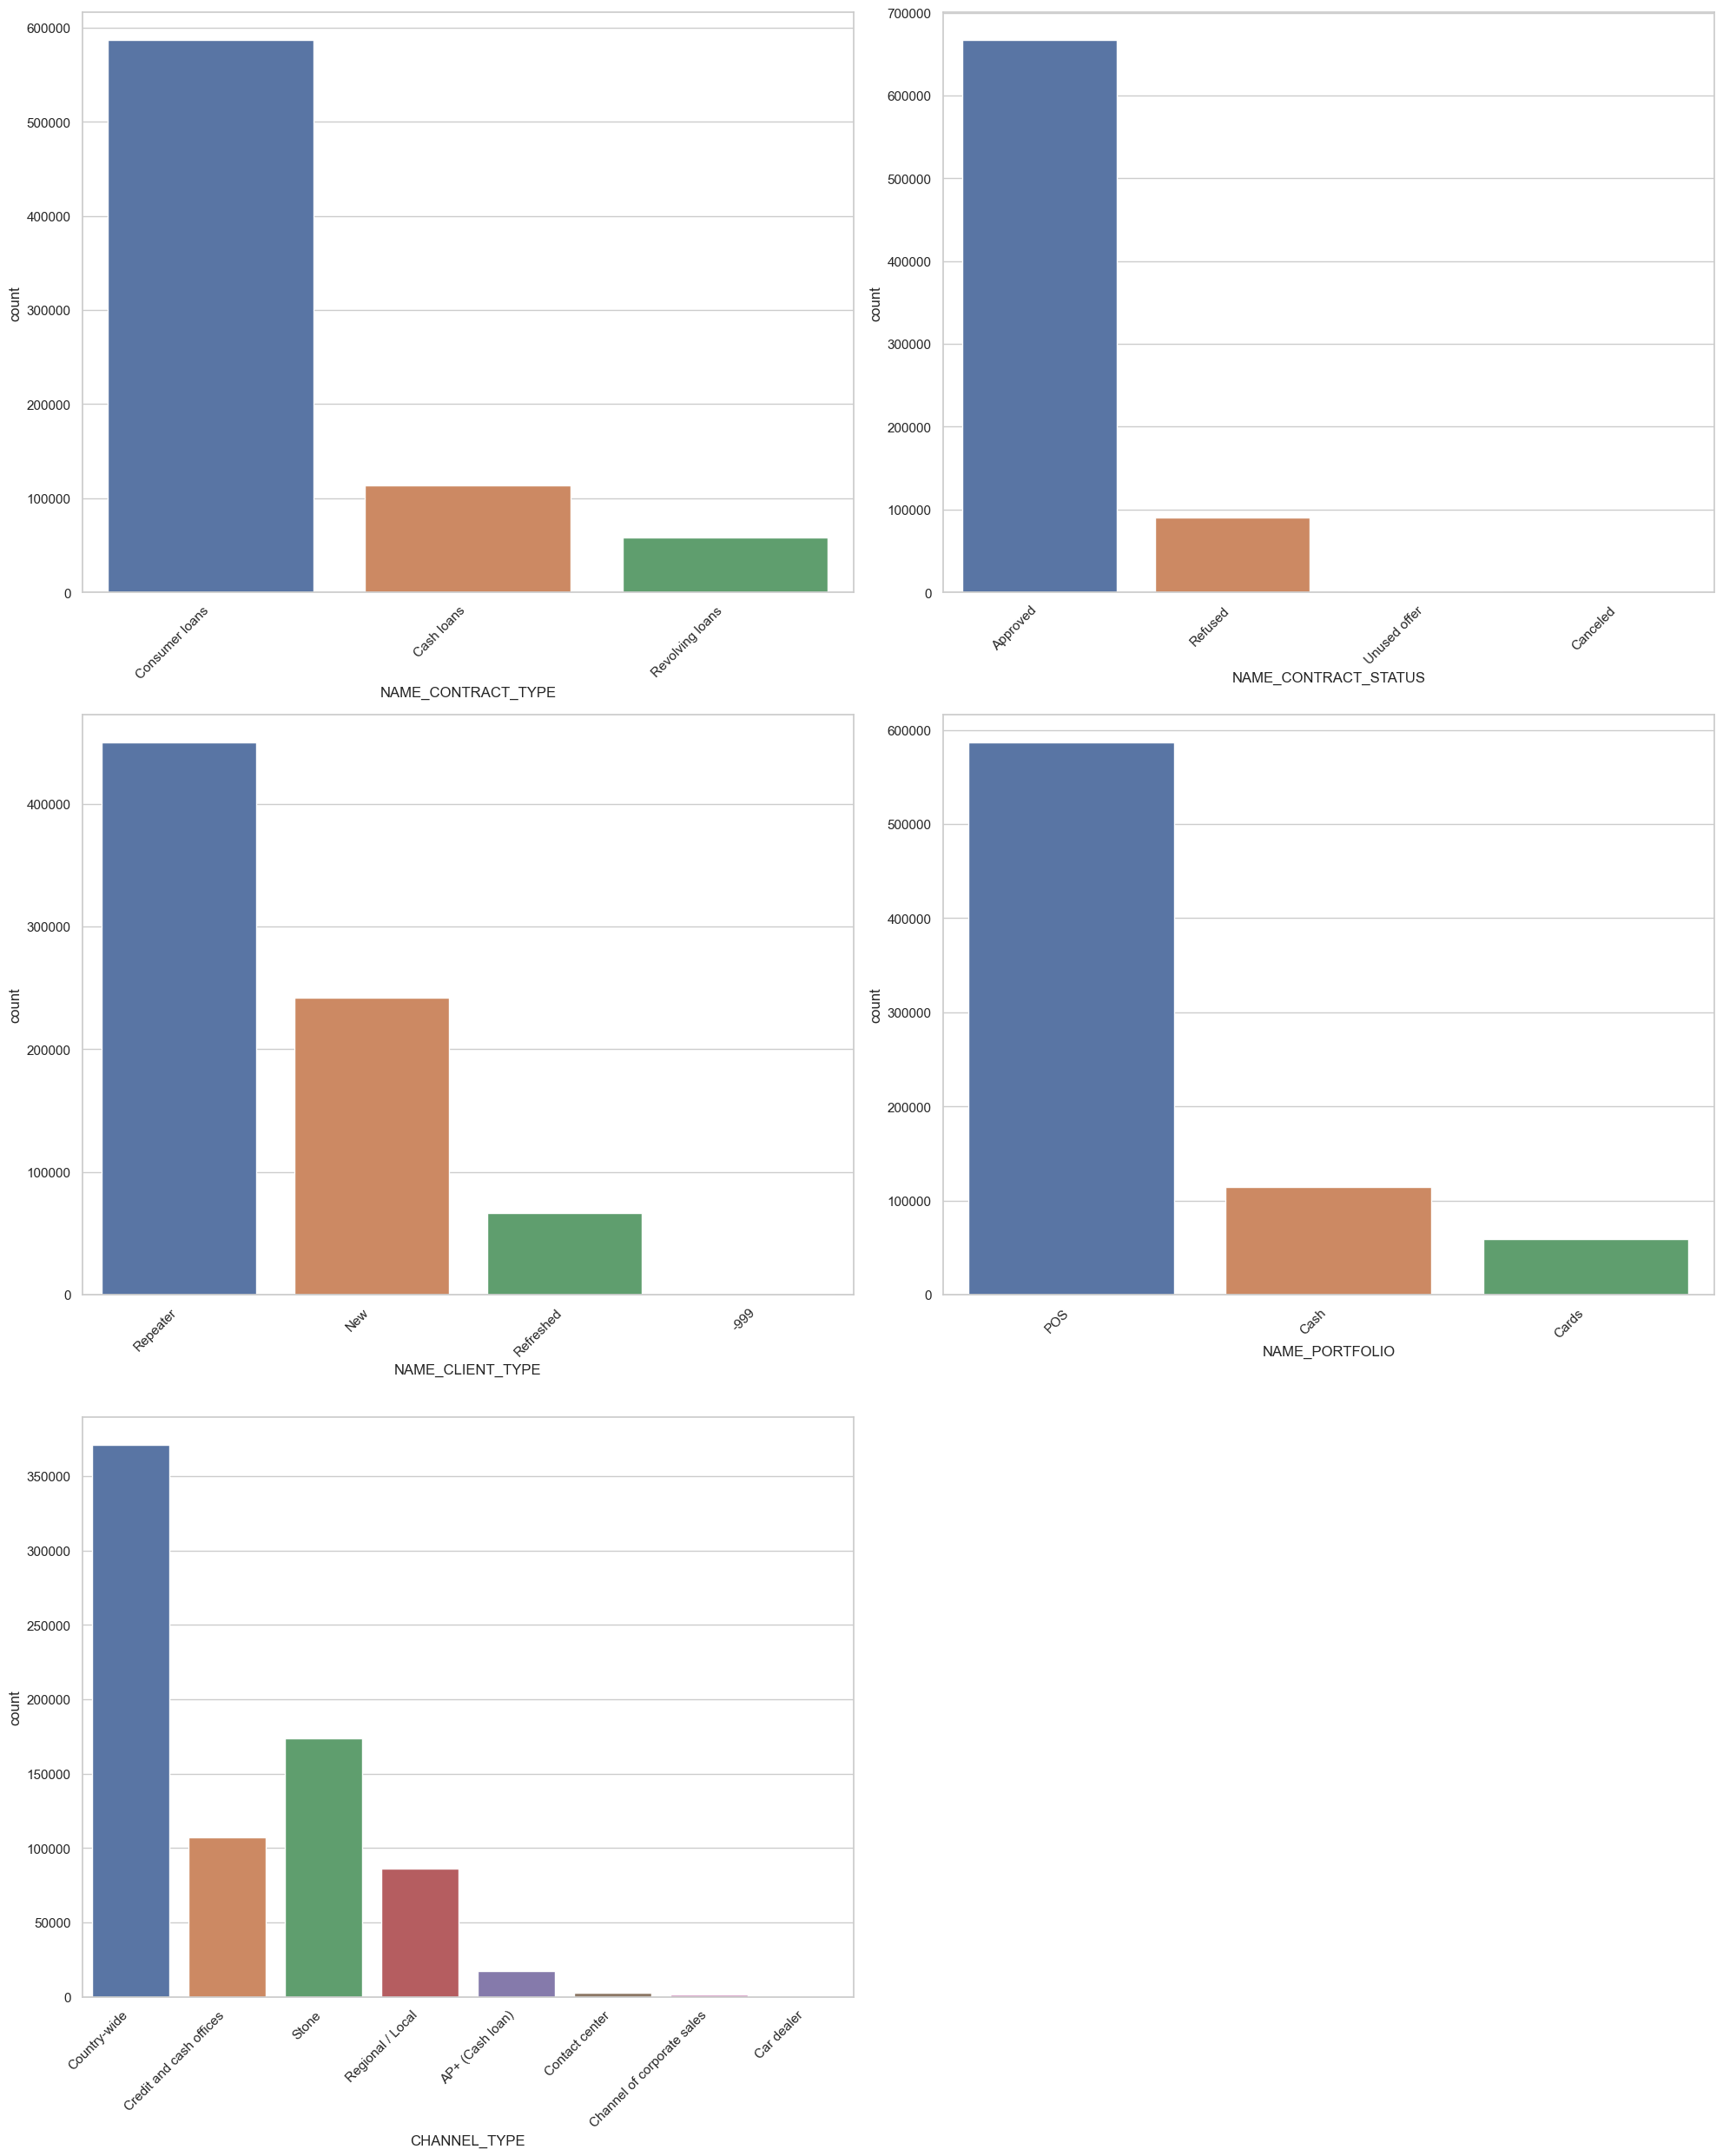

In [120]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']

plt.figure(figsize=(20, 25))

for k, col in enumerate(col_list, start=1):
    plt.subplot(3, 2, k)
    ax = sns.countplot(x=col, data=prev_app)
    plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


- NAME_CONTRACT_TYPE - Revolving Loans are in veru less quantity
- NAME_CONTRACT_STATUS - Canceled loans are almost negligible and there are very few Refused loans
- NAME_CLIENT_TYPE - Refreshed applicant are in very few quantity and New are also very less
- NAME_PORTFOLIO - For Cards and Cars there are very less application
- CHANNEL_TYPE - Contact center, AP+(Cash loan) and Regional/Local are in very few in quantity and there are negligible Channel of corporate scales and Car dealer

### Merging  Application data and Previous application dataset

In [121]:
# Taking useful columns from Application data dataframe 
app_data_cols= ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_GROUP','EXT_SOURCE_SCORE','AGE_GROUP']

In [122]:
app_data_merge=app_data[app_data_cols]
app_data_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS INCOME_GROUP  EXT_SOURCE_SCORE AGE_GROUP  
0  Single / not married         High              0.20     Young  
1               Married         High              0.57     Adult  
2  Single / not married          Low              0.64     Adult  
3        Civil marriage       Medium              0.58     Adult  
4  Single / not married       Medium              0.42     Adult

### Removing irrelavant columns form Previous application dataframe

In [123]:
# prev_app.columns.tolist()
prev_app_removed=['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [124]:
prev_app_merge=prev_app.drop(prev_app_removed,axis=1)
prev_app_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   

    AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0      17145.0                   -999             Approved   
2     136444.5                   -999             Approved   
13     57564.0                   -999             Approved   
14     27252.0                   -999             Approved   
15    119853.0                   -999             Approved   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0   Cash through the bank               -999         Repeater   
2   Cash through the bank               -999         Repeater   
13  Cash through the bank               -999              New   
14  Cash through the bank               -999              New   
15  Cash through the bank               -999              New   

       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                   Mobile            POS              -999   
2                     -999           Cash            x-sell   
13    Consumer Electronics            POS              -999   
14  Construction Materials            POS              -999   
15        Auto Accessories            POS              -999   

               CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0              Country-wide          Connectivity         12.0   
2   Credit and cash offices                  -999         12.0   
13             Country-wide  Consumer electronics          8.0   
14                    Stone  Consumer electronics          3.0   
15         Regional / Local              Industry          6.0   

   NAME_YIELD_GROUP  MONTH_DECISION  
0            middle               3  
2              high              11  
13       low_action              14  
14           middle              25  
15       low_normal              24

### Merging both datasets

In [125]:
#Merging both the datasets
# SK_ID_CURR column used as the key to join the two dataframes 
merged_df = pd.merge(prev_app_merge,app_data_merge, on='SK_ID_CURR', how='left')
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     1397919      321676     Consumer loans     7654.860          53779.5   
3     2273188      270658     Consumer loans     9644.220          26550.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
2     57564.0                   -999             Approved   
3     27252.0                   -999             Approved   
4    119853.0                   -999             Approved   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
2  Cash through the bank               -999              New   
3  Cash through the bank               -999              New   
4  Cash through the bank               -999              New   

      NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                  Mobile            POS              -999   
1                    -999           Cash            x-sell   
2    Consumer Electronics            POS              -999   
3  Construction Materials            POS              -999   
4        Auto Accessories            POS              -999   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
2             Country-wide  Consumer electronics          8.0   
3                    Stone  Consumer electronics          3.0   
4         Regional / Local              Industry          6.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3     0.0           F   
1             high              11     0.0           F   
2       low_action              14     NaN         NaN   
3           middle              25     NaN         NaN   
4       low_normal              24     0.0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
2                            NaN                NaN          NaN   
3                            NaN                NaN          NaN   
4  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE AGE_GROUP  
0              0.60     Adult  
1              0.38     Young  
2               NaN       NaN  
3               NaN       NaN  
4              0.59     Young

In [126]:
merged_df.shape

(759425, 26)

In [127]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759425 entries, 0 to 759424
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   SK_ID_PREV              759425 non-null  int64   
 1   SK_ID_CURR              759425 non-null  int64   
 2   NAME_CONTRACT_TYPE      759425 non-null  object  
 3   AMT_ANNUITY             759425 non-null  float64 
 4   AMT_APPLICATION         759425 non-null  float64 
 5   AMT_CREDIT              759425 non-null  float64 
 6   NAME_CASH_LOAN_PURPOSE  759425 non-null  object  
 7   NAME_CONTRACT_STATUS    759425 non-null  object  
 8   NAME_PAYMENT_TYPE       759425 non-null  object  
 9   CODE_REJECT_REASON      759425 non-null  object  
 10  NAME_CLIENT_TYPE        759425 non-null  object  
 11  NAME_GOODS_CATEGORY     759425 non-null  object  
 12  NAME_PORTFOLIO          759425 non-null  object  
 13  NAME_PRODUCT_TYPE       759425 non-null  object  
 14  CHAN

# DANGER

In [128]:
# We can see from above that there are some 'NaN' values in 'TARGET' column
# Checking how many null values present in the 'TARGET' column
merged_df['TARGET'].isna().value_counts()

False    649428
True     109997
Name: TARGET, dtype: int64

In [129]:
# Total null values in the column 'TARGET' 
merged_df['TARGET'].isna().sum()

109997

In [130]:
# Removing these null values from the column
merged_df = merged_df[(~(np.isnan(merged_df['TARGET'])))]    

In [131]:
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
4    119853.0                   -999             Approved   
5     27297.0                   -999             Approved   
7     49455.0      Everyday expenses              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
4  Cash through the bank               -999              New   
5  Cash through the bank               -999         Repeater   
7                   -999                 HC         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS              -999   
1                      -999           Cash            x-sell   
4          Auto Accessories            POS              -999   
5  Photo / Cinema Equipment            POS              -999   
7                      -999           Cash           walk-in   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
4         Regional / Local              Industry          6.0   
5                    Stone  Consumer electronics          8.0   
7          AP+ (Cash loan)                  -999         18.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3     0.0           F   
1             high              11     0.0           F   
4       low_normal              24     0.0           M   
5             high              50     0.0           M   
7             high              20     0.0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
4  Secondary / secondary special            Married         High   
5  Secondary / secondary special            Married       Medium   
7  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE       AGE_GROUP  
0              0.60           Adult  
1              0.38           Young  
4              0.59           Young  
5              0.56           Adult  
7              0.32  Senior citizen

In [132]:
# We can see from above info that TARGET i.e. Numerical column in of float64 type, so converting it to int64
merged_df['TARGET']=merged_df['TARGET'].astype('int64')

In [133]:
merged_df['AMT_APPLICATION']

0          17145.0
1         112500.0
4         126490.5
5          26955.0
7          45000.0
            ...   
759419     45450.0
759420     22207.5
759421    112500.0
759423    105237.0
759424    180000.0
Name: AMT_APPLICATION, Length: 649428, dtype: float64

### Univariate analysis for continious variables

Based on loan initially applied for

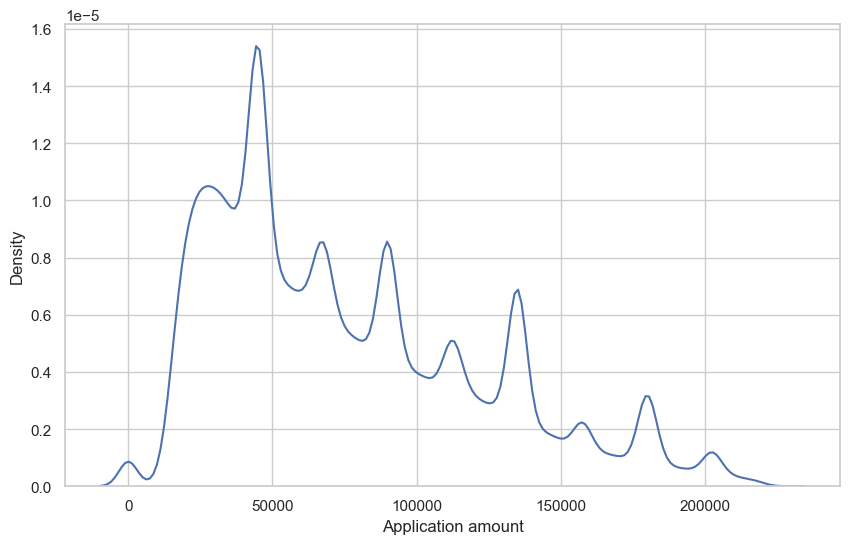

In [134]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the distribution plot and set labels
sns.distplot(merged_df['AMT_APPLICATION'], hist=False)
plt.xlabel('Application amount')

# Display the plot
plt.show()

### Conclusion:
- From the above plot most of the applications were for below 250000 amount

Based for the pervious application decision relative to the application data amount of months

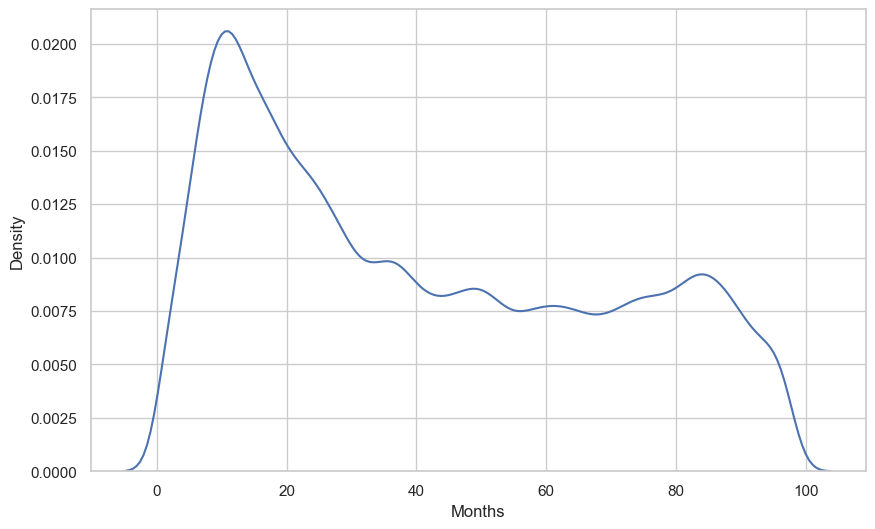

In [135]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the distribution plot and set labels
sns.distplot(merged_df['MONTH_DECISION'], hist=False)
plt.xlabel('Months')

# Display the plot
plt.show()

Based on After application, Loan credited for

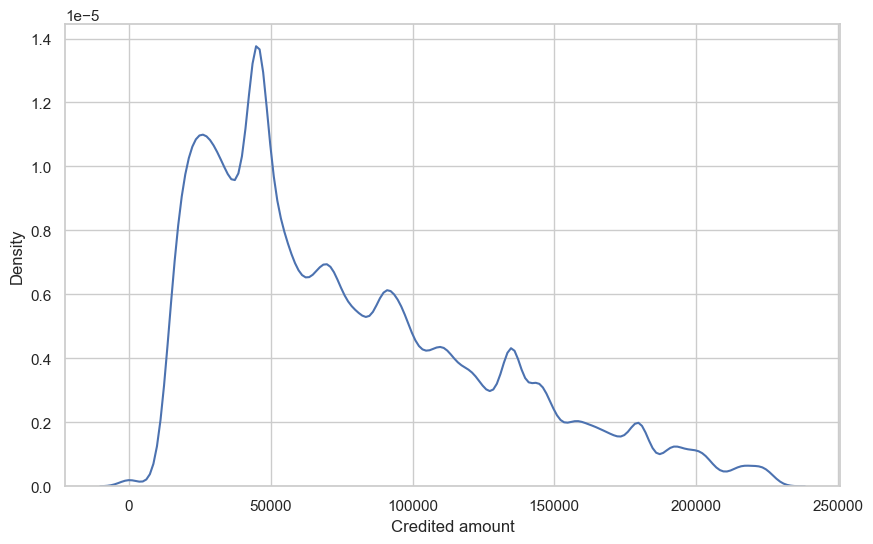

In [136]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the distribution plot and set labels
sns.distplot(merged_df['AMT_CREDIT'], hist=False)
plt.xlabel('Credited amount')

# Display the plot
plt.show()

### Conclusion:
- Mostly credited loan was for under 300000

### Univariate analysis on unordered categorical variable

Based on Status of applications

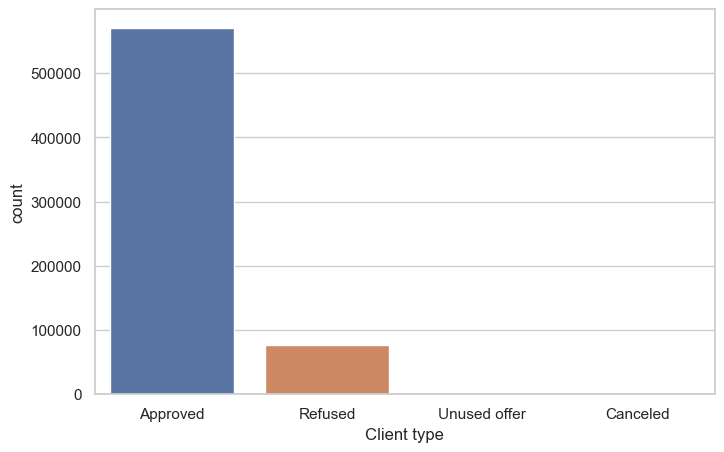

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot and set labels
sns.countplot(x='NAME_CONTRACT_STATUS', data=merged_df)
plt.xlabel('Client type')

# Display the plot
plt.show()


### Conclusion:
- Mostly applications were approved

Based on mode of payment

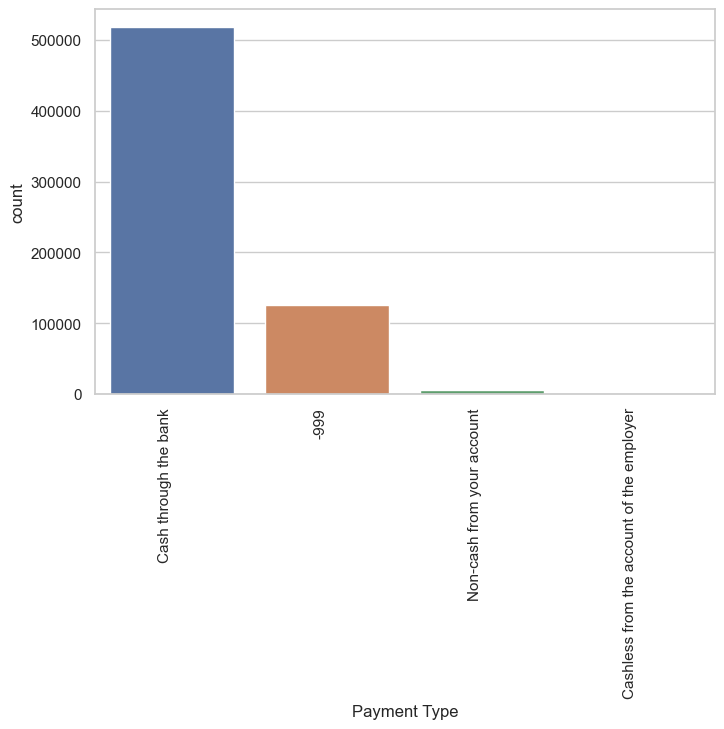

In [138]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot with rotated x-axis labels and set labels
ax = sns.countplot(x='NAME_PAYMENT_TYPE', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('Payment Type')

# Display the plot
plt.show()


### Conclusion:
- Payment method that client chose to pay for the previous application was highest for Cash through the bank

Based on type of Clients

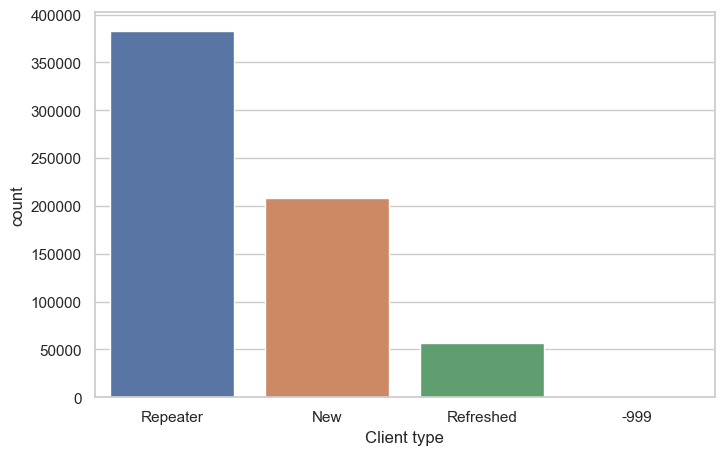

In [139]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot and set labels
sns.countplot(x='NAME_CLIENT_TYPE', data=merged_df)
plt.xlabel('Client type')

# Display the plot
plt.show()

### Conclusion:
- There are higher number of repeaters overall, followed by New clients

Based on Portfolio of previous application

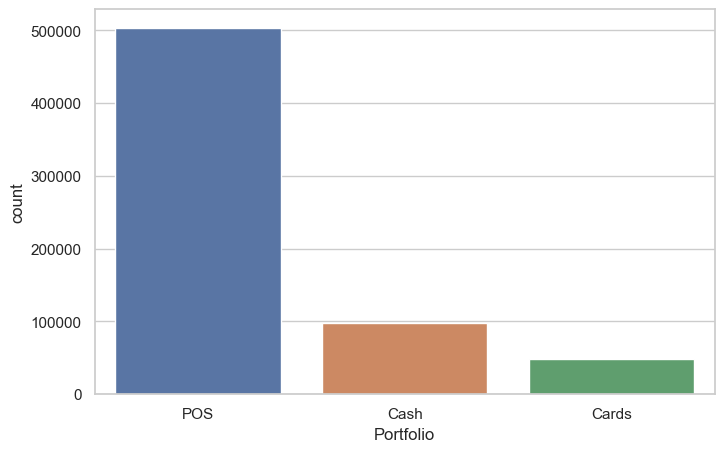

In [140]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot and set labels
sns.countplot(x='NAME_PORTFOLIO', data=merged_df)
plt.xlabel('Portfolio')

# Display the plot
plt.show()


### Conclusion:
- Highest number of previous applications was for POS but very few compared with POS was Cash and Cards

Based on type of Application channel types

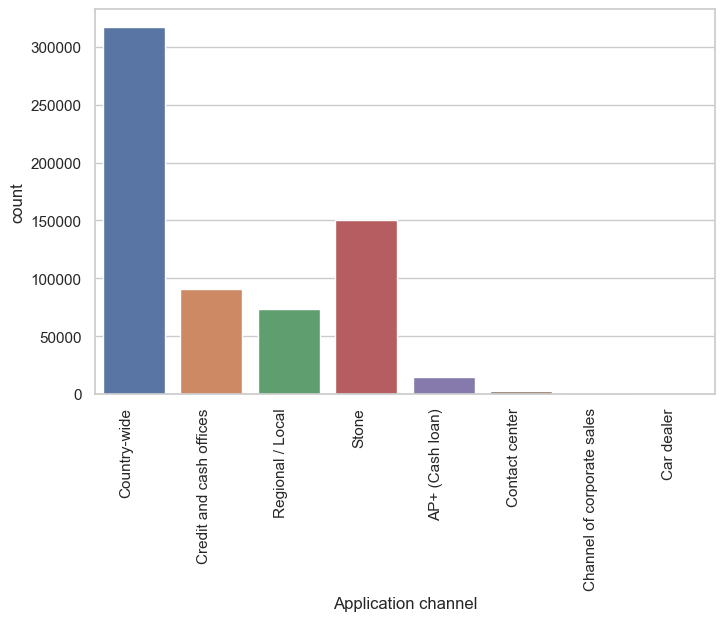

In [141]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot with rotated x-axis labels and set labels
ax = sns.countplot(x='CHANNEL_TYPE', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('Application channel')

# Display the plot
plt.show()


### Conclusion:
- For previous application, country-wide,Stone and Credit and cash offices were highly used

Based on status of income

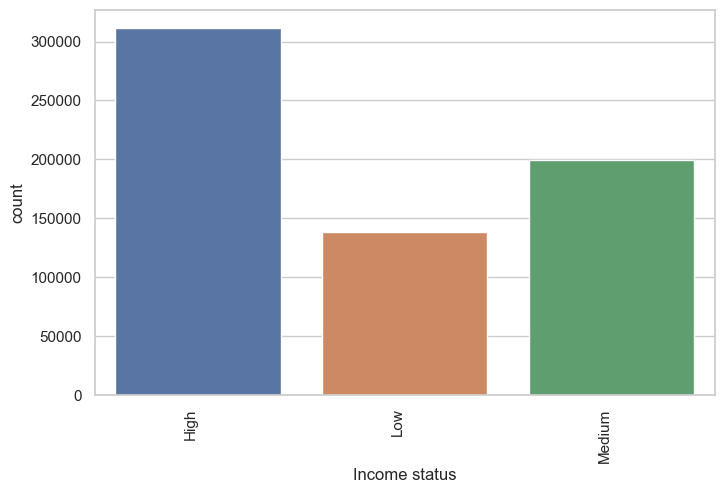

In [142]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot with rotated x-axis labels and set labels
ax = sns.countplot(x='INCOME_GROUP', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('Income status')

# Display the plot
plt.show()


### Conclusion:
- People with High and Medium income for application data are higher than those who have Low income

Based on different categories of age group

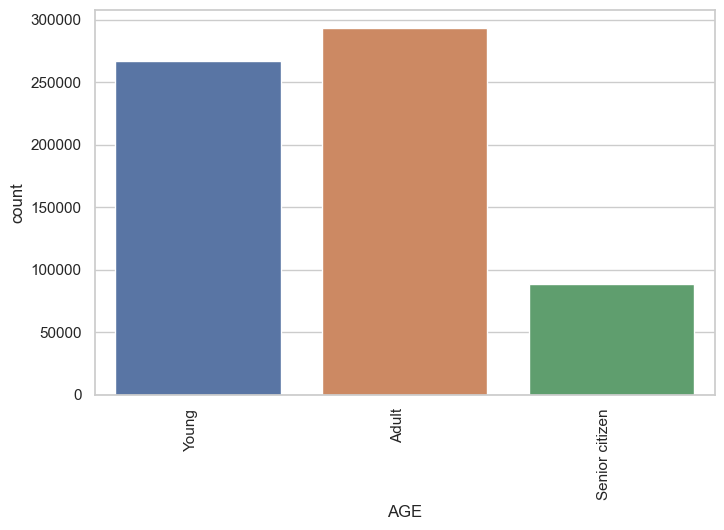

In [143]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the countplot with rotated x-axis labels and set labels
ax = sns.countplot(x='AGE_GROUP', data=merged_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('AGE')

# Display the plot
plt.show()


### Conclusion:
- Adult people and Young one take loan in hgher amount than Senior citizen

### Bivariate analysis

In [144]:
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
4    119853.0                   -999             Approved   
5     27297.0                   -999             Approved   
7     49455.0      Everyday expenses              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
4  Cash through the bank               -999              New   
5  Cash through the bank               -999         Repeater   
7                   -999                 HC         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS              -999   
1                      -999           Cash            x-sell   
4          Auto Accessories            POS              -999   
5  Photo / Cinema Equipment            POS              -999   
7                      -999           Cash           walk-in   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
4         Regional / Local              Industry          6.0   
5                    Stone  Consumer electronics          8.0   
7          AP+ (Cash loan)                  -999         18.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3       0           F   
1             high              11       0           F   
4       low_normal              24       0           M   
5             high              50       0           M   
7             high              20       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
4  Secondary / secondary special            Married         High   
5  Secondary / secondary special            Married       Medium   
7  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE       AGE_GROUP  
0              0.60           Adult  
1              0.38           Young  
4              0.59           Young  
5              0.56           Adult  
7              0.32  Senior citizen

### Listing and checking correlation among relatable numerical columns

In [145]:
relatable_col = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT','MONTH_DECISION']

In [146]:
merged_df_corr=merged_df[relatable_col]
merged_df_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  CNT_PAYMENT  MONTH_DECISION
0          17145.0     17145.0     1730.430         12.0               3
1         112500.0    136444.5    15060.735         12.0              11
4         126490.5    119853.0    21307.455          6.0              24
5          26955.0     27297.0     4187.340          8.0              50
7          45000.0     49455.0     4666.500         18.0              20

In [147]:
merged_df_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  CNT_PAYMENT  \
AMT_APPLICATION         1.000000    0.943614     0.792416     0.294558   
AMT_CREDIT              0.943614    1.000000     0.786363     0.309800   
AMT_ANNUITY             0.792416    0.786363     1.000000     0.159774   
CNT_PAYMENT             0.294558    0.309800     0.159774     1.000000   
MONTH_DECISION         -0.208835   -0.238937    -0.139068     0.099204   

                 MONTH_DECISION  
AMT_APPLICATION       -0.208835  
AMT_CREDIT            -0.238937  
AMT_ANNUITY           -0.139068  
CNT_PAYMENT            0.099204  
MONTH_DECISION         1.000000

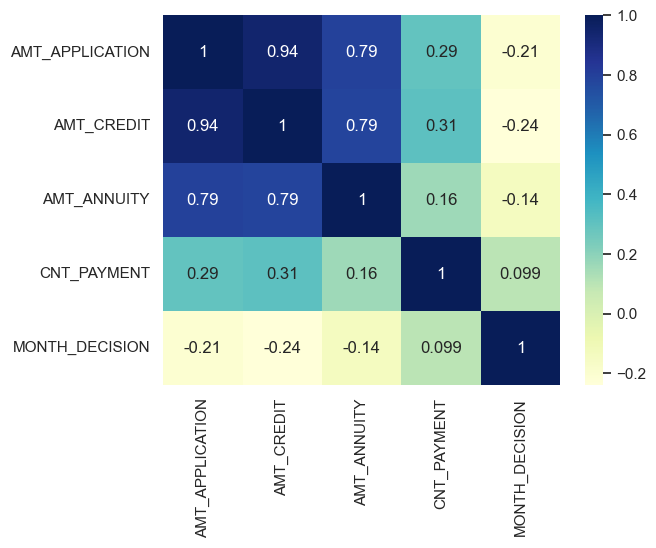

In [148]:
# Plotting heatmaps for clear analysis
sns.heatmap(merged_df_corr.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Conclusion:

- AMT_CREDIT and AMT_APPLICATION are highly correlated(0.96)
- AMT_ANNUITY and AMT_APPLICATION are highly correlated(0.8)
- AMT_CREDIT and AMT_ANNUITY are highly correlated(0.8

- AMT_APPLICATION and CNT_PAYMENT are less correlated(0.21)
- AMT_CREDIT and CNT_PAYMENT are less correlated(0.24

### Bivariate analysis for categorical variable

In [149]:
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
4    119853.0                   -999             Approved   
5     27297.0                   -999             Approved   
7     49455.0      Everyday expenses              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
4  Cash through the bank               -999              New   
5  Cash through the bank               -999         Repeater   
7                   -999                 HC         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS              -999   
1                      -999           Cash            x-sell   
4          Auto Accessories            POS              -999   
5  Photo / Cinema Equipment            POS              -999   
7                      -999           Cash           walk-in   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
4         Regional / Local              Industry          6.0   
5                    Stone  Consumer electronics          8.0   
7          AP+ (Cash loan)                  -999         18.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3       0           F   
1             high              11       0           F   
4       low_normal              24       0           M   
5             high              50       0           M   
7             high              20       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
4  Secondary / secondary special            Married         High   
5  Secondary / secondary special            Married       Medium   
7  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE       AGE_GROUP  
0              0.60           Adult  
1              0.38           Young  
4              0.59           Young  
5              0.56           Adult  
7              0.32  Senior citizen

Listing categorical columns in a list and checking loan Credited for those categories

In [150]:
# Category list
cat_list = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

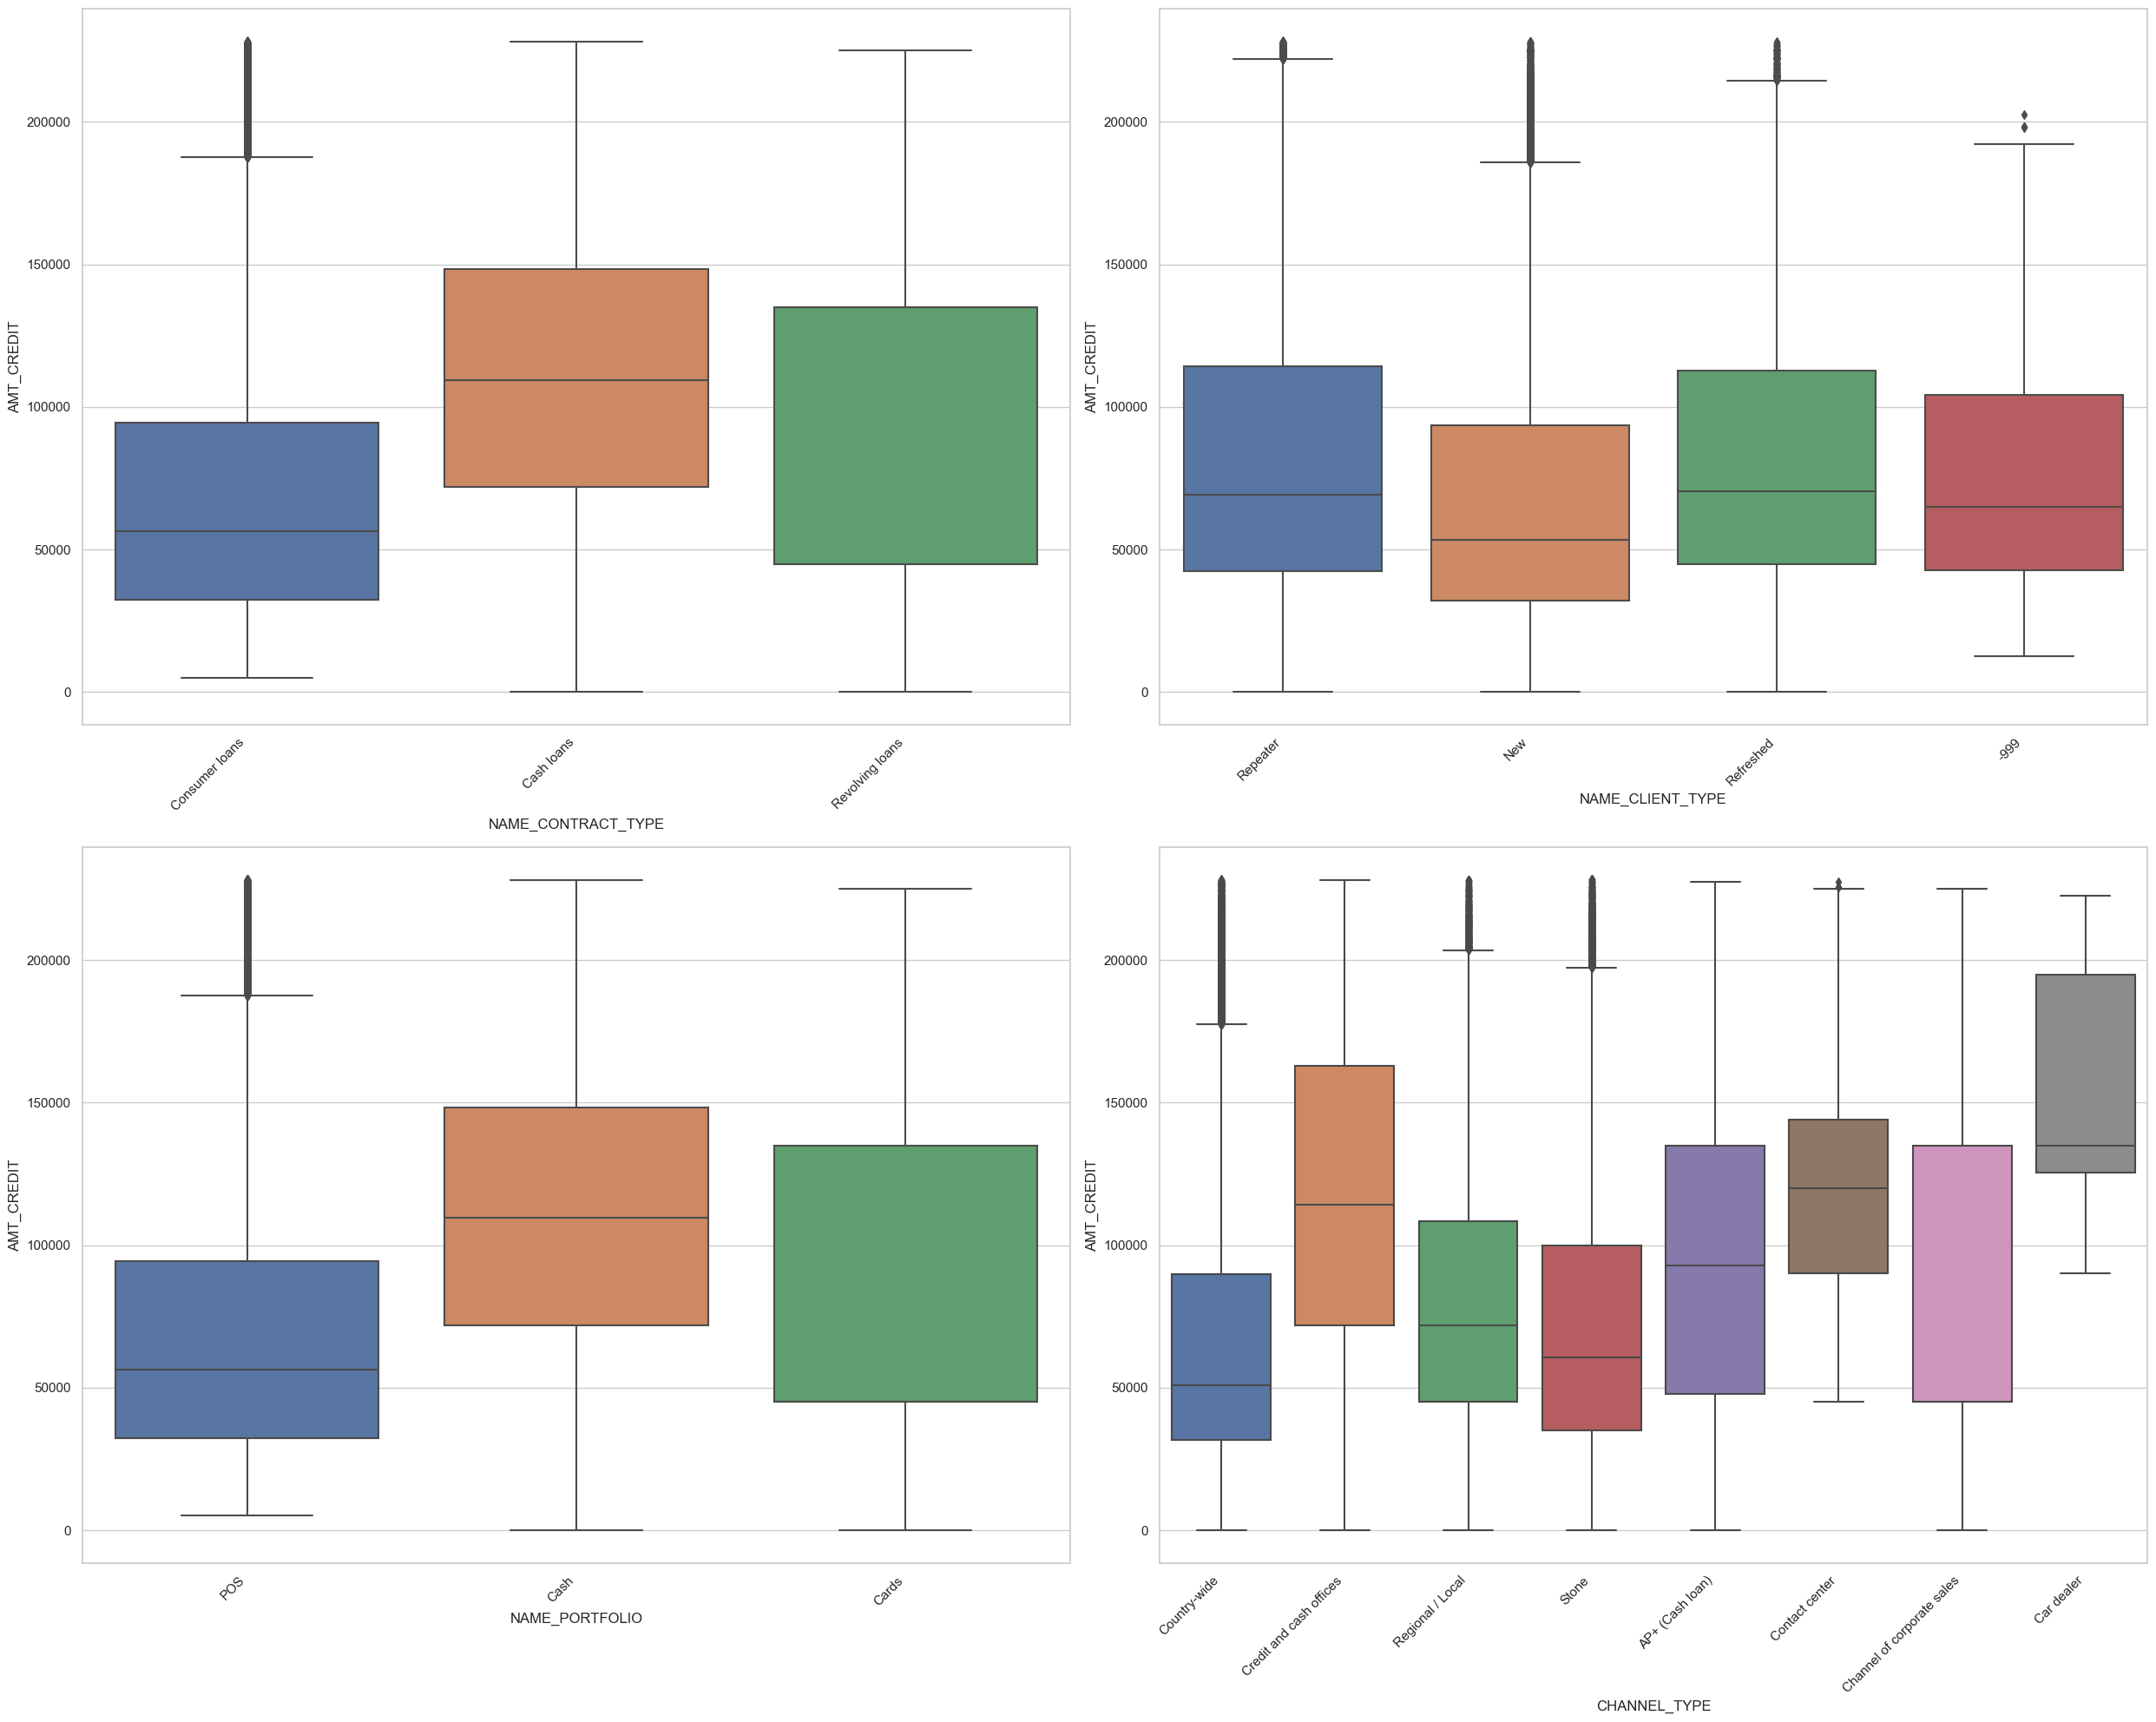

In [151]:
# Set the figure size
plt.figure(figsize=(25,20))

# Iterate through categories and create subplots
for i, category in enumerate(cat_list, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=category, y='AMT_CREDIT', data=merged_df)
    plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Conclusion:

- Cash loans are highly credited than Revolving and Consumer loans
- More amount loan were given to Repeater clients than new and refreshed clients
- The loan with portfolio Cash are highly credited followed by Cards
- The credit amount of the loan is more as Credit and cash offices followed by Contact center, AP+ (Cash loan) and very less for   Regional, Stone and Country-wide channels

### Bivariate analysis for continious variable

In [152]:
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
4    119853.0                   -999             Approved   
5     27297.0                   -999             Approved   
7     49455.0      Everyday expenses              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
4  Cash through the bank               -999              New   
5  Cash through the bank               -999         Repeater   
7                   -999                 HC         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS              -999   
1                      -999           Cash            x-sell   
4          Auto Accessories            POS              -999   
5  Photo / Cinema Equipment            POS              -999   
7                      -999           Cash           walk-in   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
4         Regional / Local              Industry          6.0   
5                    Stone  Consumer electronics          8.0   
7          AP+ (Cash loan)                  -999         18.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3       0           F   
1             high              11       0           F   
4       low_normal              24       0           M   
5             high              50       0           M   
7             high              20       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
4  Secondary / secondary special            Married         High   
5  Secondary / secondary special            Married       Medium   
7  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE       AGE_GROUP  
0              0.60           Adult  
1              0.38           Young  
4              0.59           Young  
5              0.56           Adult  
7              0.32  Senior citizen

Based on Application amount and Credited amount

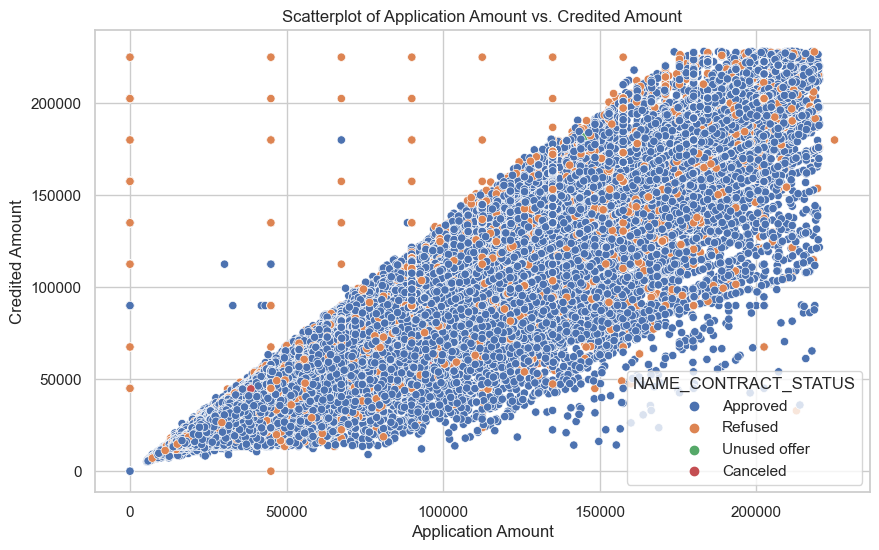

In [153]:
# Create a DataFrame with the required columns
scatterplot_data = merged_df[['AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS']]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data=scatterplot_data)

# Set labels and title
ax.set(xlabel='Application Amount', ylabel='Credited Amount')
plt.title('Scatterplot of Application Amount vs. Credited Amount')

# Show the plot
plt.show()


### Conclusion:
- There is a strong linear relationship between these two variables. This suggests that the amount requested in the loan application closely corresponds to the actual credited amount
- Different contract statuses are represented by distinct colors in the plot, allowing for easy differentiation and analysis of the data.

Based on relative to current application when was the decision about previous application made

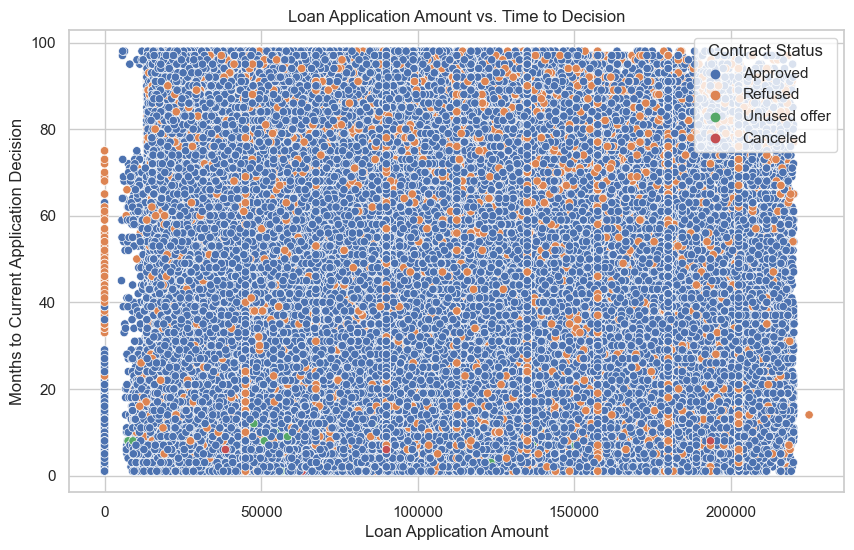

In [154]:
# Create a DataFrame with the required columns
scatterplot_data = merged_df[['AMT_APPLICATION', 'MONTH_DECISION', 'NAME_CONTRACT_STATUS']]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='AMT_APPLICATION', y='MONTH_DECISION', hue='NAME_CONTRACT_STATUS', data=scatterplot_data)

# Set labels and title based on the analysis
ax.set(xlabel='Loan Application Amount', ylabel='Months to Current Application Decision')
plt.title('Loan Application Amount vs. Time to Decision')
plt.legend(title='Contract Status')

# Show the plot
plt.show()

### Conclusion:
- As the loan application amount increases, the time taken to make the decision on the application reduces i.e,higher loan amounts tend to have quicker decision times compared to lower loan amounts. 
- The general trend of quicker decisions for larger loan amounts remains consistent across different contract statuses.

### Anslysis for segmented variables

In [155]:
merged_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0                   -999             Approved   
1    136444.5                   -999             Approved   
4    119853.0                   -999             Approved   
5     27297.0                   -999             Approved   
7     49455.0      Everyday expenses              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank               -999         Repeater   
1  Cash through the bank               -999         Repeater   
4  Cash through the bank               -999              New   
5  Cash through the bank               -999         Repeater   
7                   -999                 HC         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS              -999   
1                      -999           Cash            x-sell   
4          Auto Accessories            POS              -999   
5  Photo / Cinema Equipment            POS              -999   
7                      -999           Cash           walk-in   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0             Country-wide          Connectivity         12.0   
1  Credit and cash offices                  -999         12.0   
4         Regional / Local              Industry          6.0   
5                    Stone  Consumer electronics          8.0   
7          AP+ (Cash loan)                  -999         18.0   

  NAME_YIELD_GROUP  MONTH_DECISION  TARGET CODE_GENDER  \
0           middle               3       0           F   
1             high              11       0           F   
4       low_normal              24       0           M   
5             high              50       0           M   
7             high              20       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS INCOME_GROUP  \
0              Incomplete higher            Married         High   
1  Secondary / secondary special            Married          Low   
4  Secondary / secondary special            Married         High   
5  Secondary / secondary special            Married       Medium   
7  Secondary / secondary special            Married         High   

   EXT_SOURCE_SCORE       AGE_GROUP  
0              0.60           Adult  
1              0.38           Young  
4              0.59           Young  
5              0.56           Adult  
7              0.32  Senior citizen

Based on Contract type and status

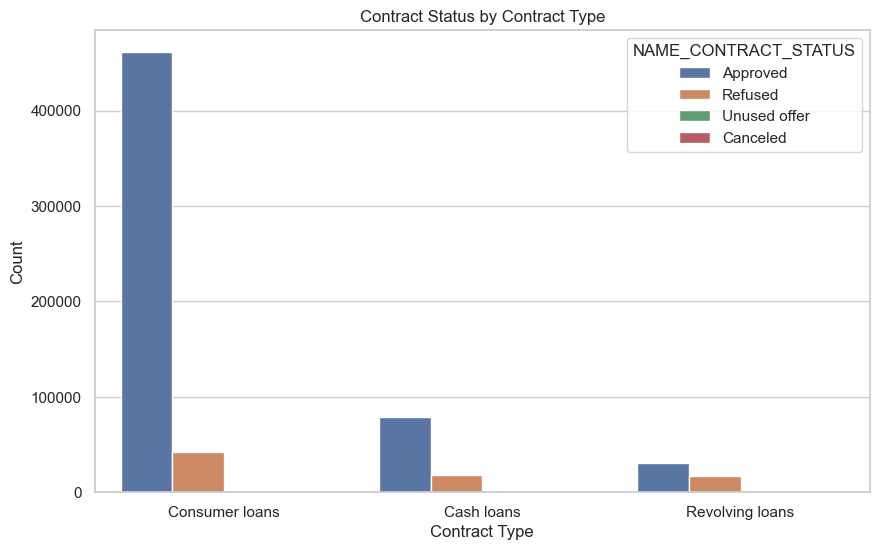

In [156]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot with specified data and hue
ax = sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=merged_df)

# Set labels and title
ax.set(xlabel='Contract Type', ylabel='Count')
plt.title('Contract Status by Contract Type')

# Show the plot
plt.show()

### Conclusion:
- More aprooved loans were of Consumer loans and least were for Revolving loans

Based on type of Clients and their status

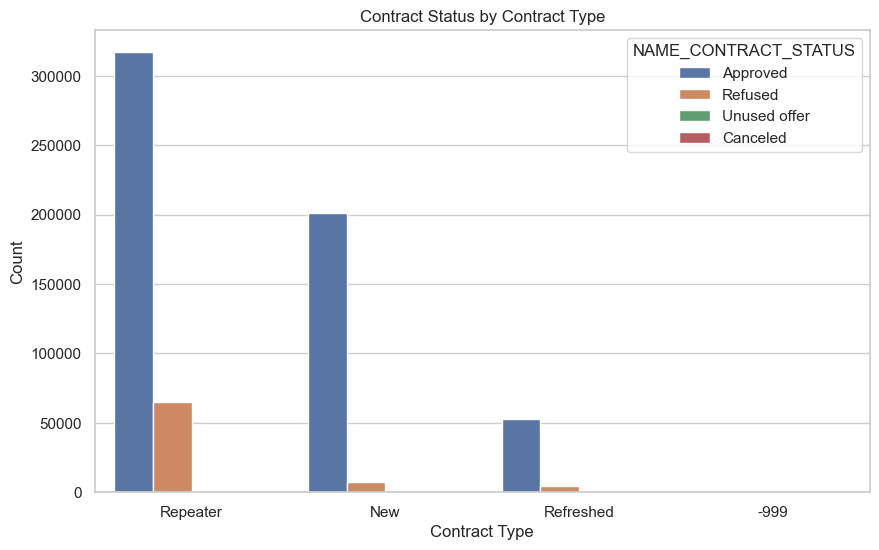

In [157]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot with specified data and hue
ax = sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=merged_df)

# Set labels and title
ax.set(xlabel='Contract Type', ylabel='Count')
plt.title('Contract Status by Contract Type')

# Show the plot
plt.show()

### Conclusion:
- Most loans were aprooved for Repeaters followed by New customers

Based on status of defaulter vs previous loan application porrtfolio of loan

<Figure size 800x500 with 0 Axes>

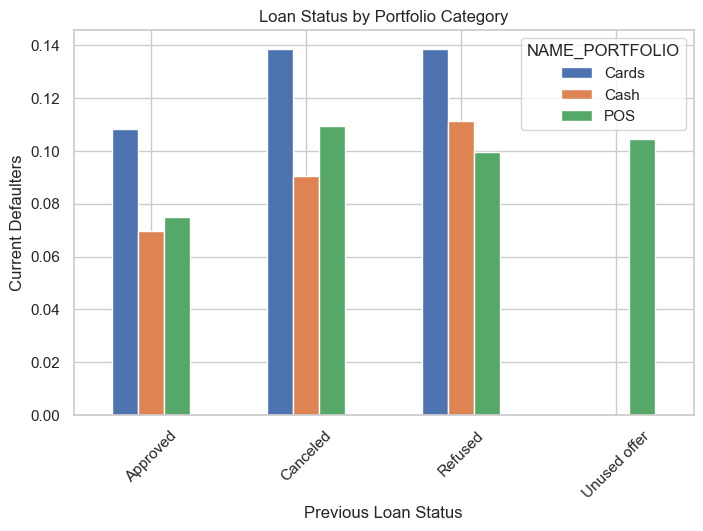

In [158]:
# Create a pivot table with specified columns and values
pivot_table = merged_df.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='NAME_PORTFOLIO', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the pivot table as a bar plot
ax = pivot_table.plot.bar(rot=45, figsize=(8, 5))

# Set labels and title
plt.xlabel('Previous Loan Status')
plt.ylabel('Current Defaulters')
plt.title('Loan Status by Portfolio Category')

# Show the plot
plt.show()


### Conclusion:
- Most of defaulters clients were the one whose previous loan were for Cards
- Clients who applied for Cash were less defaulted
- Clients who applied for POS were less defaulted

Based on current loan defaulter vs previous loan application status and Income group

<Figure size 800x500 with 0 Axes>

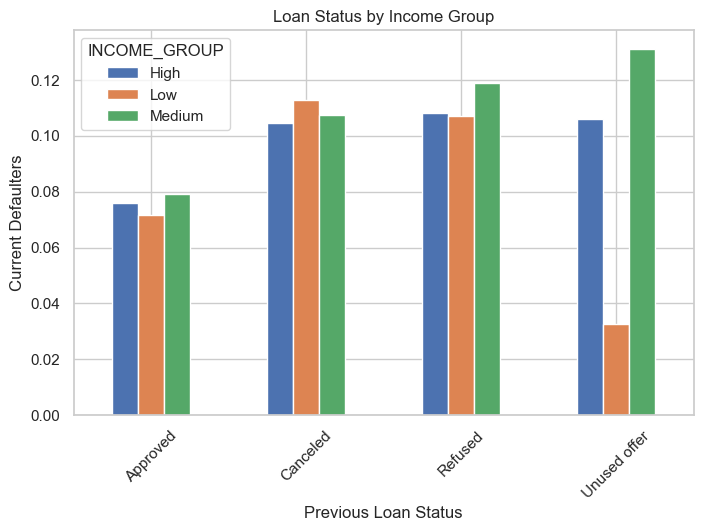

In [159]:
# Create a pivot table with specified columns and values
pivot_table = merged_df.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='INCOME_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the pivot table as a bar plot
ax = pivot_table.plot.bar(rot=45, figsize=(8, 5))

# Set labels and title
plt.xlabel('Previous Loan Status')
plt.ylabel('Current Defaulters')
plt.title('Loan Status by Income Group')

# Show the plot
plt.show()


### Conclusion:
- For Unused offers, Medium income group were more defaulted and Low income group were least
- For Aprooved, Medium income group were least defaulted among all
- It is almost similar for all income type of groups for Canceled loan status

Based on current defaulter status vs previous loan status and age group

<Figure size 800x500 with 0 Axes>

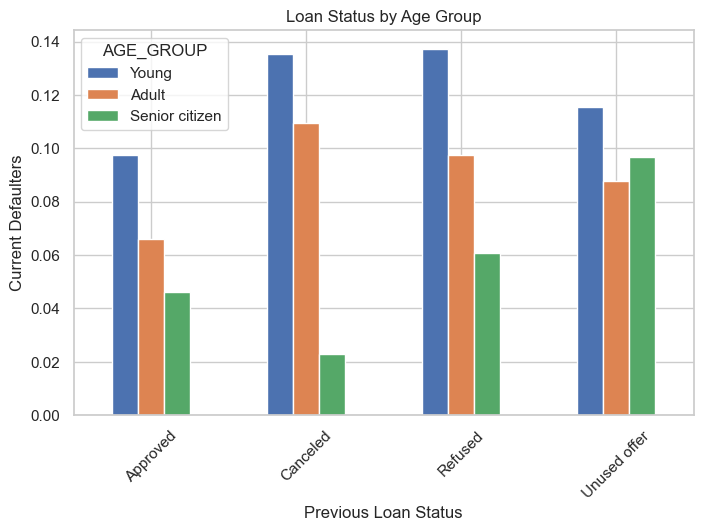

In [160]:
# Create a pivot table with specified columns and values
pivot_table = merged_df.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='AGE_GROUP', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the pivot table as a bar plot
ax = pivot_table.plot.bar(rot=45, figsize=(8, 5))

# Set labels and title
plt.xlabel('Previous Loan Status')
plt.ylabel('Current Defaulters')
plt.title('Loan Status by Age Group')

# Show the plot
plt.show()


### Conclusion:
- Higher number pf loans were refused to Young 
- Among all type of agr groups, Senior citizen are less defaulter

Based on current loan defaulter vs previous loan defaulter and Client type

<Figure size 800x500 with 0 Axes>

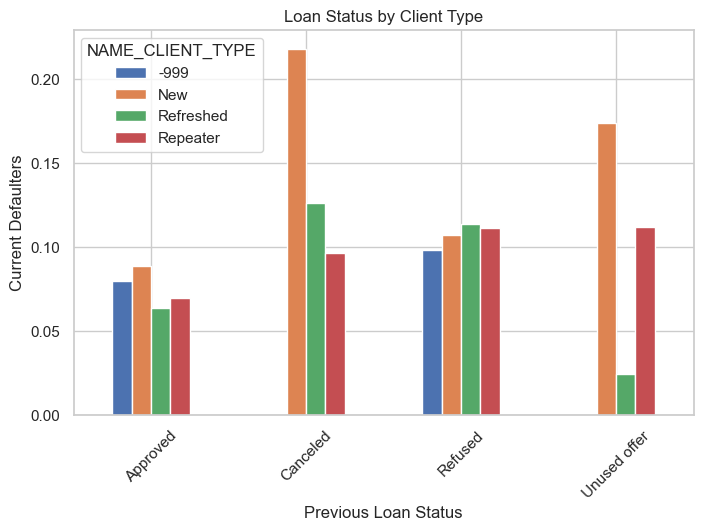

In [161]:
import matplotlib.pyplot as plt

# Create a pivot table with specified columns and values
pivot_table = merged_df.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the pivot table as a bar plot
ax = pivot_table.plot.bar(rot=45, figsize=(8, 5))

# Set labels and title
plt.xlabel('Previous Loan Status')
plt.ylabel('Current Defaulters')
plt.title('Loan Status by Client Type')

# Show the plot
plt.show()


### Conclusion:
- The data indicates a higher default rate among clients who were new and had unused offers in their previous loan status.
- New clients with previously approved statuses had a higher default rate, followed by repeat clients.
- Among applicants who were previously refused, those who were refreshed clients had a higher default rate.
- Similarly, new clients among previously canceled applicants showed a higher rate of default.